# **Proyecto 3:** Implementación de Metaheurísticas
## Intregantes

* Rodrigo Paz Londoño
* Sebastián Palma Mogollón
* Miguel Santiago Castillo Hernandez 


## Descripción del Problema

### Conjuntos

* Clientes  
  $$ C = \{C1, C2, C3, C4, C5, C6, ..., C24\} $$
  **indice:** $c \in C$  

* Vehículos
  $$ V = \{V1, V2, V3, V4, V5, V6, V7, V8\} $$
  **indice:** $v \in V$  

* Nodos
  $$ N = \{CD0, C1, C2, C3, C4, C5, C6, ..., C24\} $$
  **indice:** $n \in N$  

* Arcos
  $$ A = \left(i,j\right):\:i\in N,\:j\in N,\:i\ne j $$


### Parametros

* Distancia entre 2 nodos $ i $ y $ j $

$$ Dist_{i,j} $$

* Demanda de un cliente 

$$ D_i $$

* Capacidad de un vehiculo 

$$ Q $$

* Costo fijo por usar un vehiculo usado 

$$ C_{fixed} $$

* Costo variable por kilometro recorrido 

$$ C_{dist} $$

* Costo por hora de operacion

$$ C_{time} $$

* Costo de combustible por kilometro

$$ C_{fuel} $$

* Velocidad promedio del vehiculo 

$$ V $$

### Variables de decision

* $x_{v,i,j}$: Variable binaria para saber si un camión $v$ usa el arco $(i,j)$ para viajar de un lugar $i$ hasta el lugar $j$

  $$ x_{v,i,j} \ (v \in V,\ i \in N,\ j \in N),\ x_{v,i,j} \in \left[0,1\right] $$

* $y_v$: Variable binaria para saber si el vehiculo $ v $ es utilizado 
$$ y_v\left(v\in V\right),y_v\in \left[0,1\right] $$

* $u_{v,i}$: Variable entera que define el orden de los nodos por los cuales pasa el camion $ v $
$$ u_{v,i}\left(v\in V\right),u_{v,i}\in \left[1,n\right] $$


### Funcion objetivo 

$$ Min\:\sum _{v\in V}C_{fixed}\cdot y_v+\sum _{v\in V}\sum _{\left(i,j\right)\in A}C_{dist}+C_{fuel}+\frac{C_{time}}{v}\cdot Dist_{i,j}\cdot x_{v,i,j} $$

### Restricciones

* Cada cliente visitado exactamente una vez 

$$ \sum _{v\in V}\sum _{i\in N:i\ne j}x_{v,i,j}=1\: $$

* Flujo de conservacion de carga 

$$ \sum _{i\in N:i\ne n}x_{v,i,n}=\sum _{j\in N:j\ne n}x_{v,n,j} $$

* Control de la salida y entrada del deposito 

$$ \sum _{j\in C}x_{v,depot,j}=y_v\:\wedge \sum _{i\in C}x_{v,i,depot}=y_v $$

* Capacidad del vehiculo 

$$ \sum _{j\in C}D_j\cdot \sum _{i\in N:i\ne j}x_j\le Q\cdot y_v $$

* Eliminacion de subciclos 

$$ u_{v,j}\ge D_j\cdot \left(\sum _{i\in N:i\ne j}x_{v,i,j}\:\right)\wedge u_{v,j}\le \:Q\cdot \left(\sum _{i\in N:i\ne j}x_{v,i,j}\:\right)  $$


## Carga de datos

### Caso base

In [43]:
import pandas as pd

clients_CB = pd.read_csv("Proyecto_Caso_Base/clients.csv")
depots_CB = pd.read_csv("Proyecto_Caso_Base/depots.csv")
vehicles_CB = pd.read_csv("Proyecto_Caso_Base/vehicles.csv")
# usar el promedio
caps_base = vehicles_CB["Capacity"]
Q_base = int(round(caps_base.mean()))
vehicles_CB["Capacity"] = Q_base
parameters_CB = pd.read_csv("Proyecto_Caso_Base/parameters_base.csv")

print("CLIENTES")
display(clients_CB.head())

print("\n VEHICULOS")
display(vehicles_CB.head())

print("\n DEPOSITOS")
display(depots_CB.head())

print("\n PARAMETROS")
display(parameters_CB.head())


CLIENTES


,ClientID,StandardizedID,LocationID,Latitude,Longitude,Demand
0,1,C001,2,4.597954,-74.098938,13
1,2,C002,3,4.687821,-74.075571,15
2,3,C003,4,4.709494,-74.107085,12
3,4,C004,5,4.605029,-74.097280,15
4,5,C005,6,4.648464,-74.164641,20



 VEHICULOS


,VehicleID,StandardizedID,Capacity,Range
0,1,V001,105,170
1,2,V002,105,200
2,3,V003,105,180
3,4,V004,105,90
4,5,V005,105,100



 DEPOSITOS


,DepotID,StandardizedID,LocationID,Longitude,Latitude
0,1,CD01,1,-74.153536,4.743359



 PARAMETROS


,Parameter,Value,Unit,Description
0,fuel_price,16300,COP/gallon,Standard gasoline price
1,fuel_efficiency_typical,30,km/gallon,Typical vehicle fuel efficiency estimate


### Caso 2

In [44]:
clients_C2 = pd.read_csv("Proyecto_A_Caso2/clients.csv")
depots_C2_raw = pd.read_csv("Proyecto_A_Caso2/depots.csv")
depot_C2 = depots_C2_raw.drop(columns=["Capacity"]).iloc[[0]]
vehicles_C2_raw = pd.read_csv("Proyecto_A_Caso2/vehicles.csv")
vehicles_C2 = vehicles_C2_raw[["VehicleID", "StandardizedID", "Capacity", "Range"]].copy()
# promedio
caps_2 = vehicles_C2["Capacity"]
Q_2 = int(round(caps_2.mean()))
vehicles_C2["Capacity"] = Q_2
parameters_C2 = pd.read_csv("Proyecto_A_Caso2/parameters_urban.csv")

print("CLIENTES")
display(clients_C2.head())

print("\n VEHICULOS")
display(vehicles_C2.head())

print("\n DEPOSITOS")
display(depot_C2.head())

print("\n PARAMETROS")
display(parameters_C2.head())

CLIENTES


,ClientID,StandardizedID,LocationID,Latitude,Longitude,Demand
0,1,C001,13,4.632553,-74.196992,12
1,2,C002,14,4.601328,-74.155037,15
2,3,C003,15,4.732421,-74.101787,15
3,4,C004,16,4.638612,-74.194862,6
4,5,C005,17,4.727692,-74.110272,5



 VEHICULOS


,VehicleID,StandardizedID,Capacity,Range
0,1,V001,68,145.852071
1,2,V002,68,1304.605971
2,3,V003,68,953.172609
3,4,V004,68,17.302304
4,5,V005,68,16.627680



 DEPOSITOS


,DepotID,StandardizedID,LocationID,Longitude,Latitude
0,1,CD01,1,-74.081242,4.750212



 PARAMETROS


,Parameter,Value,Unit,Description
0,C_fixed,50000,COP/vehicle,Fixed activation cost per vehicle
1,C_dist,2500,COP/km,Variable cost per kilometer (maintenance and w...
2,C_time,7600,COP/hour,Urban driver hourly cost
3,fuel_price,16300,COP/gallon,Gasoline price
4,fuel_efficiency_van_small_min,35,km/gallon,Small van minimum fuel efficiency


### Caso 3

In [45]:
clients_C3_raw = pd.read_csv("Proyecto_A_Caso3/clients.csv")
clients_C3= clients_C3_raw[["ClientID", "StandardizedID", "LocationID",
                                 "Latitude", "Longitude", "Demand"]].copy()
depots_C3_raw = pd.read_csv("Proyecto_A_Caso3/depots.csv")
depot_C3 = depots_C3_raw.drop(columns=["Capacity"]).iloc[[0]]
vehicles_C3_raw = pd.read_csv("Proyecto_A_Caso3/vehicles.csv")
vehicles_C3 = vehicles_C3_raw[["VehicleID", "StandardizedID", "Capacity", "Range"]].copy()
caps_3 = vehicles_C3["Capacity"]
Q_3 = int(round(caps_3.mean()))
vehicles_C3["Capacity"] = Q_3
parameters_C3 = pd.read_csv("Proyecto_A_Caso3/parameters_urban.csv")

print("CLIENTES")
display(clients_C3.head())

print("\n VEHICULOS")
display(vehicles_C3.head())

print("\n DEPOSITOS")
display(depot_C3.head())

print("\n PARAMETROS")
display(parameters_C3.head())

CLIENTES


,ClientID,StandardizedID,LocationID,Latitude,Longitude,Demand
0,1,C001,12,4.679769,-74.150806,13
1,2,C002,13,4.733831,-74.017996,15
2,3,C003,14,4.620928,-74.143655,16
3,4,C004,15,4.733074,-74.034583,22
4,5,C005,16,4.820900,-74.055887,14



 VEHICULOS


,VehicleID,StandardizedID,Capacity,Range
0,1,V001,83,146
1,2,V002,83,196
2,3,V003,83,143
3,4,V004,83,174
4,5,V005,83,167



 DEPOSITOS


,DepotID,StandardizedID,LocationID,Longitude,Latitude
0,1,CD01,1,-74.081242,4.750212



 PARAMETROS


,Parameter,Value,Unit,Description
0,C_fixed,50000,COP/vehicle,Fixed activation cost per vehicle
1,C_dist,2500,COP/km,Variable cost per kilometer (maintenance and w...
2,C_time,7600,COP/hour,Urban driver hourly cost
3,fuel_price,16300,COP/gallon,Gasoline price
4,fuel_efficiency_van_small_min,35,km/gallon,Small van minimum fuel efficiency


### Matrices

In [46]:
import pandas as pd
import numpy as np
from math import radians, sin, cos, sqrt, atan2

def haversine_km(lat1, lon1, lat2, lon2):
    R = 6371.0  # radio de la Tierra en km
    phi1, phi2 = radians(lat1), radians(lat2)
    dphi = radians(lat2 - lat1)
    dlambda = radians(lon2 - lon1)

    a = sin(dphi/2)**2 + cos(phi1)*cos(phi2)*sin(dlambda/2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    return R * c

def build_and_save_distance_matrix(clients_csv, depot_base_csv, out_csv, nombre_caso):
    clients = pd.read_csv(clients_csv)
    depots_base = pd.read_csv(depot_base_csv)
    depot_df = depots_base[["StandardizedID", "Latitude", "Longitude"]].iloc[[0]].copy()

    nodes = pd.concat(
        [
            depot_df,
            clients[["StandardizedID", "Latitude", "Longitude"]]
        ],
        ignore_index=False
    )
    nodes = (
        nodes
        .drop_duplicates(subset="StandardizedID")
        .set_index("StandardizedID")
        .sort_index()   
    )

    std_ids = nodes.index.to_list()
    n = len(std_ids)
    dist_matrix = np.zeros((n, n), dtype=float)
    for i, id_i in enumerate(std_ids):
        lat_i, lon_i = nodes.loc[id_i, ["Latitude", "Longitude"]]
        for j, id_j in enumerate(std_ids):
            lat_j, lon_j = nodes.loc[id_j, ["Latitude", "Longitude"]]
            dist_matrix[i, j] = haversine_km(lat_i, lon_i, lat_j, lon_j)

    dist_df = pd.DataFrame(dist_matrix, index=std_ids, columns=std_ids)
    dist_df.to_csv(out_csv, index=True)

    print(f"[{nombre_caso}] Matriz de distancias guardada en: {out_csv}")
    print(f"  Tamaño: {dist_df.shape[0]} nodos x {dist_df.shape[1]} nodos\n")

    return dist_df


depot_base_csv   = "Proyecto_Caso_Base/depots.csv"
clients_base_csv = "Proyecto_Caso_Base/clients.csv"
clients_C2_csv   = "Proyecto_A_Caso2/clients.csv"
clients_C3_csv   = "Proyecto_A_Caso3/clients.csv"
out_base_csv = "Proyecto_Caso_Base/dist_matrix_CB.csv"
out_C2_csv   = "Proyecto_A_Caso2/dist_matrix_C2.csv"
out_C3_csv   = "Proyecto_A_Caso3/dist_matrix_C3.csv"

# Construir matrices
dist_df_CB = build_and_save_distance_matrix(clients_base_csv, depot_base_csv, out_base_csv, "Caso Base")
dist_df_C2 = build_and_save_distance_matrix(clients_C2_csv,   depot_base_csv, out_C2_csv,   "Caso 2")
dist_df_C3 = build_and_save_distance_matrix(clients_C3_csv,   depot_base_csv, out_C3_csv,   "Caso 3")


[Caso Base] Matriz de distancias guardada en: Proyecto_Caso_Base/dist_matrix_CB.csv
  Tamaño: 25 nodos x 25 nodos

[Caso 2] Matriz de distancias guardada en: Proyecto_A_Caso2/dist_matrix_C2.csv
  Tamaño: 10 nodos x 10 nodos

[Caso 3] Matriz de distancias guardada en: Proyecto_A_Caso3/dist_matrix_C3.csv
  Tamaño: 91 nodos x 91 nodos



Leer parámetros de costos

In [47]:
def get_cost_parameters(params_df):

    def val(name):
        return float(params_df.loc[params_df["Parameter"] == name, "Value"].iloc[0])

    C_fixed = val("C_fixed")
    C_dist  = val("C_dist")
    C_time  = val("C_time")
    fuel_price   = val("fuel_price")                     # COP/gal
    fuel_eff_km  = val("fuel_efficiency_van_small_min")  # km/gal
    C_fuel_per_km = fuel_price / fuel_eff_km             # COP/km

    return C_fixed, C_dist, C_time, C_fuel_per_km



#### Función para generar gráficas

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import folium
import numpy as np

# Funciones auxiliares
def _time_to_hours_generic(t):
    if pd.isna(t):
        return 0.0
    if isinstance(t, (int, float, np.integer, np.floating)):
        return float(t)
    t = str(t)
    if ":" in t:
        h, m = t.split(":")
        return int(h) + int(m) / 60.0
    try:
        return float(t)
    except:
        return 0.0


def _sum_demands_from_string(demand_str):
    if pd.isna(demand_str) or str(demand_str).strip() == "":
        return 0.0
    parts = str(demand_str).split(",")
    total = 0.0
    for p in parts:
        p = p.strip()  
        if ":" in p:
            _, val = p.split(":")
            try:
                total += float(val)
            except:
                pass
    return total


def _parse_demand_list(demand_str):
    demands = []
    if pd.isna(demand_str) or str(demand_str).strip() == "":
        return demands

    parts = str(demand_str).split(",")
    for p in parts:
        p = p.strip()
        if ":" in p:
            _, val = p.split(":")
            try:
                demands.append(float(val))
            except:
                pass
    return demands



def plot_verification_report(verif_csv, case_name, depots_df, clients_df, depot_id="CD01", map_html=None):

    # Cargar archivo
    verif = pd.read_csv(verif_csv)
    verif["VehicleId"] = verif["VehicleId"].astype(str)

    # Normalizar nombres de columnas 
    cols = verif.columns

    # Distancia total
    if "TotalDistance" not in cols:
        raise ValueError("La columna 'TotalDistance' no está en el archivo de verificación.")

    # Tiempo total
    time_col = "TotalTime"
    if time_col not in cols:
        raise ValueError("La columna 'TotalTime' no está en el archivo de verificación.")

    # Costos
    cost_col = None
    if "Cost" in cols:
        cost_col = "Cost"
    elif "FuelCost" in cols:
        cost_col = "FuelCost"

    # Carga inicial
    if "InitialLoad" not in cols:
        raise ValueError("La columna 'InitialLoad' no está en el archivo de verificación.")

    # Columna con carga entregada / demanda atendida
    delivered_col = None
    if "DeliveredLoad" in cols:
        delivered_col = "DeliveredLoad"
    elif "DemandsSatisfied" in cols:
        delivered_col = "DemandsSatisfied"
    elif "DemandSatisfied" in cols:
        delivered_col = "DemandSatisfied"

    # Secuencia de ruta
    if "RouteSequence" not in cols:
        raise ValueError("La columna 'RouteSequence' no está en el archivo de verificación.")

    # Tiempo en horas
    verif["TotalTimeHours"] = verif[time_col].apply(_time_to_hours_generic)

    # Carga entregada
    if delivered_col is None:
        verif["DeliveredLoad"] = 0.0
    else:
        if np.issubdtype(verif[delivered_col].dtype, np.number):
            verif["DeliveredLoad"] = verif[delivered_col].astype(float)
        else:
            verif["DeliveredLoad"] = verif[delivered_col].apply(_sum_demands_from_string)

    # GRAFICAS DE BARRAS

    x = range(len(verif))
    labels = verif["VehicleId"].astype(str).tolist()

    max_labels = 15              
    step = max(1, len(labels)//max_labels)
    ticks_to_show = list(range(0, len(labels), step))

    plt.figure(figsize=(14, 4))
    plt.bar(x, verif["TotalDistance"])
    plt.xticks(ticks_to_show,
            [labels[i] for i in ticks_to_show],
            rotation=90,
            fontsize=8)
    plt.xlabel("Vehículo")
    plt.ylabel("Distancia total [km]")
    plt.title(f"{case_name} – Distancia total recorrida por vehículo")
    plt.grid(axis="y", linestyle="--", alpha=0.5)
    plt.tight_layout()
    plt.show()
    
    
    plt.figure(figsize=(14, 4))
    plt.bar(x, verif["TotalTimeHours"])
    plt.xticks(ticks_to_show,
            [labels[i] for i in ticks_to_show],
            rotation=90,
            fontsize=8)
    plt.xlabel("Vehículo")
    plt.ylabel("Tiempo total [h]")
    plt.title(f"{case_name} – Tiempo total de ruta por vehículo")
    plt.grid(axis="y", linestyle="--", alpha=0.5)
    plt.tight_layout()
    plt.show()

    if cost_col is not None:
        plt.figure(figsize=(14, 4))
        plt.bar(x, verif[cost_col])
        plt.xticks(ticks_to_show,
                [labels[i] for i in ticks_to_show],
                rotation=90,
                fontsize=8)
        plt.xlabel("Vehículo")
        plt.ylabel("Costo total")
        plt.title(f"{case_name} – Costo total por vehículo")
        plt.grid(axis="y", linestyle="--", alpha=0.5)
        plt.tight_layout()
        plt.show()

    # Carga inicial vs carga entregada 
    x = range(len(verif))
    width = 0.35

    plt.figure(figsize=(14, 4))
    plt.bar([i - width/2 for i in x], verif["InitialLoad"],
            width=width, label="Carga inicial")
    plt.bar([i + width/2 for i in x], verif["DeliveredLoad"],
            width=width, label="Carga entregada")
    labels = verif["VehicleId"].astype(str).tolist()
    max_labels = 20
    step = max(1, len(labels)//max_labels)
    ticks_to_show = list(range(0, len(labels), step))

    plt.xticks(ticks_to_show,
           [labels[i] for i in ticks_to_show],
           rotation=90,          
           fontsize=8)   
    plt.xlabel("Vehículo")
    plt.ylabel("Carga [unidades de demanda]")
    plt.title(f"{case_name} – Carga inicial vs carga entregada por vehículo")
    plt.legend()
    plt.grid(axis="y", linestyle="--", alpha=0.5)
    plt.tight_layout()
    plt.show()



    # MAPA DE RUTAS
    all_nodes = pd.concat([depots_df, clients_df], ignore_index=True)

    coord_dict = {
        row["StandardizedID"]: (row["Latitude"], row["Longitude"])
        for _, row in all_nodes.iterrows()
    }

    if depot_id not in coord_dict:
        print(f"Advertencia: el depot_id '{depot_id}' no está en coord_dict. No se genera mapa.")
        return

    depot_lat, depot_lon = coord_dict[depot_id]
    m = folium.Map(location=[depot_lat, depot_lon], zoom_start=12)

    palette = ["blue", "red", "green", "purple", "orange", "darkred",
               "darkblue", "darkgreen", "cadetblue", "pink"]

    vehicle_ids = verif["VehicleId"].astype(str).unique()
    color_by_vehicle = {
        veh: palette[i % len(palette)]
        for i, veh in enumerate(sorted(vehicle_ids))
    }

    for _, row in verif.iterrows():
        veh_id    = str(row["VehicleId"])
        veh_type  = str(row.get("VehicleType", "Truck"))  
        route_str = str(row["RouteSequence"])

        if pd.isna(route_str) or route_str.strip() == "":
            continue

        nodes = [n.strip() for n in route_str.split("-")]

        coords = []
        for n in nodes:
            if n in coord_dict:
                coords.append(coord_dict[n])

        if len(coords) < 2:
            continue

        color = color_by_vehicle.get(veh_id, "gray")

        # linea
        folium.PolyLine(
            locations=coords,
            color=color,
            weight=3,
            opacity=0.8,
            tooltip=f"{veh_id} ({veh_type})"
        ).add_to(m)

        # Marcadores
        for n in nodes:
            if n not in coord_dict:
                continue
            lat, lon = coord_dict[n]
            folium.CircleMarker(
                location=[lat, lon],
                radius=3,
                color=color,
                fill=True,
                fill_opacity=0.7,
                tooltip=f"{n} – {veh_id}"
            ).add_to(m)

    # Marcador del CD
    folium.Marker(
        location=[depot_lat, depot_lon],
        popup=depot_id,
        icon=folium.Icon(color="green", icon="home")
    ).add_to(m)

    if map_html is None:
        map_html = f"mapa_rutas_{case_name.replace(' ', '_')}.html"

    m.save(map_html)
    print(f"Mapa de rutas guardado en: {map_html}")
    m

## Pyomo

In [49]:
import pyomo.environ as pyo
import numpy as np
import pandas as pd

def build_pyomo_cvrp_projectA(dist_df, clients_df, vehicles_df, C_fixed, C_dist, C_time, C_fuel_per_km, avg_speed_kmh=50, depot_id="CD01"):


    # Conjuntos
    nodes = list(dist_df.index)
    depot = depot_id
    customers = [i for i in nodes if i != depot]

    # Vehiculos
    num_vehicles = len(vehicles_df)
    veh_ids = list(range(1, num_vehicles + 1))

    # Capacidad homogenea
    Q = float(vehicles_df["Capacity"].iloc[0])

    # Demandas por cliente 
    demand_dict = dict(zip(clients_df["StandardizedID"], clients_df["Demand"]))

    # Modelo
    m = pyo.ConcreteModel()

    m.V = pyo.Set(initialize=veh_ids)     
    m.N = pyo.Set(initialize=nodes)           
    m.C = pyo.Set(initialize=customers)      
    m.depot = depot

    # Arcos 
    m.A = pyo.Set(
        dimen=2,
        initialize=[(i, j) for i in nodes for j in nodes if i != j]
    )

    # Parametros
    # Distancias entre nodos
    def dist_init(m, i, j):
        return float(dist_df.loc[i, j])
    m.dist = pyo.Param(m.N, m.N, initialize=dist_init, within=pyo.NonNegativeReals)

    # Demandas
    def dem_init(m, c):
        return float(demand_dict[c])
    m.dem = pyo.Param(m.C, initialize=dem_init, within=pyo.NonNegativeReals)

    # Capacidad
    m.Q = pyo.Param(initialize=Q)

    # Costos de la FO 
    m.C_fixed = pyo.Param(initialize=float(C_fixed))
    m.C_dist = pyo.Param(initialize=float(C_dist))
    m.C_time = pyo.Param(initialize=float(C_time))
    m.C_fuel_km = pyo.Param(initialize=float(C_fuel_per_km))
    m.v_speed = pyo.Param(initialize=float(avg_speed_kmh))

    # Coeficiente lineal por km (distancia + tiempo + combustible)
    m.cost_per_km = pyo.Param(
        initialize=float(C_dist + C_fuel_per_km + C_time / avg_speed_kmh)
    )

    # Variables de decision
    m.x = pyo.Var(m.V, m.A, domain=pyo.Binary)

    # Si el el vehiculo se utiliza
    m.y = pyo.Var(m.V, domain=pyo.Binary)

    # Carga transportada
    m.u = pyo.Var(m.V, m.N, domain=pyo.NonNegativeReals, bounds=(0, Q))

    # FO
    def obj_rule(m):
        # Parte fija
        fixed_cost = sum(m.C_fixed * m.y[v] for v in m.V)

        # Parte variable 
        variable_cost = sum(
            m.cost_per_km * m.dist[i, j] * m.x[v, (i, j)]
            for v in m.V
            for (i, j) in m.A
        )
        return fixed_cost + variable_cost

    m.OBJ = pyo.Objective(rule=obj_rule, sense=pyo.minimize)

    # Restricciones

    # Cada cliente se atiende exactamente una vez
    def customer_served_once(m, c):
        return sum(m.x[v, (i, c)] for v in m.V for i in m.N if i != c) == 1
    m.VisitOnce = pyo.Constraint(m.C, rule=customer_served_once)

    # Flujo de conservacion
    def flow_conservation(m, v, n):
        return (
            sum(m.x[v, (i, n)] for i in m.N if (i, n) in m.A)
            ==
            sum(m.x[v, (n, j)] for j in m.N if (n, j) in m.A)
        )
    m.Flow = pyo.Constraint(m.V, m.N, rule=flow_conservation)

    # Salidas y entradas al deposito
    def depot_out(m, v):
        return sum(m.x[v, (depot, j)] for j in m.C) == m.y[v]
    m.DepotOut = pyo.Constraint(m.V, rule=depot_out)

    def depot_in(m, v):
        return sum(m.x[v, (i, depot)] for i in m.C) == m.y[v]
    m.DepotIn = pyo.Constraint(m.V, rule=depot_in)

    # Restricciones de capacidad
    for v in m.V:
        for c in m.C:
            # Cota superior por capacidad
            m.u[v, c].setub(Q)

    # Carga minimsa
    def load_lower_bound(m, v, c):
        return m.u[v, c] >= m.dem[c]
    m.LoadLB = pyo.Constraint(m.V, m.C, rule=load_lower_bound)

    # MTZ
    def mtz_rule(m, v, i, j):
        if i == j or i == depot or j == depot:
            return pyo.Constraint.Skip
        return m.u[v, j] >= m.u[v, i] + m.dem[j] - m.Q * (1 - m.x[v, (i, j)])
    m.MTZ = pyo.Constraint(m.V, m.C, m.C, rule=mtz_rule)

    def use_vehicle_link(m, v):
        big_M = len(m.C)  # máximo arcos que podría usar un vehículo
        return sum(m.x[v, (i, j)] for (i, j) in m.A) <= big_M * m.y[v]
    m.UseLink = pyo.Constraint(m.V, rule=use_vehicle_link)

    return m


In [ ]:
def compute_route_distance(route_nodes, dist_df, depot):
    if not route_nodes:
        return 0.0

    d = dist_df.loc[depot, route_nodes[0]]
    for i in range(len(route_nodes) - 1):
        d += dist_df.loc[route_nodes[i], route_nodes[i + 1]]
    d += dist_df.loc[route_nodes[-1], depot]
    return float(d)


def build_verification_from_pyomo(model, dist_df, clients_df, vehicles_df,
                                  depot_id, C_fuel_per_km,  costoFijo , avg_speed_kmh=50.0):

    depot = depot_id

    vehicle_ids = list(vehicles_df["StandardizedID"])
    capacities  = list(vehicles_df["Capacity"])
    demand_dict = dict(zip(clients_df["StandardizedID"], clients_df["Demand"]))

    rows = []

    for v in sorted(model.V):  
        idx = v - 1
        veh_label = vehicle_ids[idx]
        init_load = float(capacities[idx])

        arcs_v = [(i, j) for (i, j) in model.A
                  if pyo.value(model.x[v, (i, j)]) > 0.5]
        
        route_nodes = []
        if arcs_v:
            succ = {i: j for (i, j) in arcs_v}
            current = depot
            while True:
                if current not in succ:
                    break
                nxt = succ[current]
                if nxt == depot:
                    break
                route_nodes.append(nxt)
                current = nxt

        clients_served = len(route_nodes)
        demand_satisfied = sum(demand_dict[c] for c in route_nodes)

        total_dist = compute_route_distance(route_nodes, dist_df, depot)
        total_time = total_dist / avg_speed_kmh if avg_speed_kmh > 0 else 0.0
        fuel_cost  = C_fuel_per_km * total_dist

        if route_nodes:
            route_seq = "-".join([depot] + route_nodes + [depot])
        else:
            route_seq = f"{depot}-{depot}"

        rows.append({
            "VehicleId": veh_label,
            "DepotId": depot,
            "InitialLoad": init_load,
            "RouteSequence": route_seq,
            "ClientsServed": clients_served,
            "DemandsSatisfied": demand_satisfied,
            "TotalDistance": round(total_dist, 1),
            "TotalTime": round(total_time, 1),
            "FuelCost": round(fuel_cost, 0),
            "TotalCost": round(fuel_cost+costoFijo)
        })

    verif_df = pd.DataFrame(rows)
    return verif_df



### Resolver Modelo

#### Caso base

Read LP format model from file C:\Users\msant\AppData\Local\Temp\tmpb1z2ul45.pyomo.lp
Reading time = 0.03 seconds
x1: 4856 rows, 5000 columns, 32856 nonzeros
Set parameter TimeLimit to value 1200
Set parameter MIPGap to value 0.01
Gurobi Optimizer version 12.0.3 build v12.0.3rc0 (win64 - Windows 11+.0 (26200.2))

CPU model: AMD Ryzen 5 8640HS w/ Radeon 760M Graphics, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Non-default parameters:
TimeLimit  1200
MIPGap  0.01

Optimize a model with 4856 rows, 5000 columns and 32856 nonzeros
Model fingerprint: 0xd93e6b75
Variable types: 192 continuous, 4808 integer (4808 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+02]
  Objective range  [1e+03, 8e+04]
  Bounds range     [1e+00, 1e+02]
  RHS range        [1e+00, 1e+02]
Presolve removed 200 rows and 0 columns
Presolve time: 0.08s
Presolved: 4656 rows, 5000 columns, 31904 nonzeros
Variable types: 192 continuous, 

,VehicleId,DepotId,InitialLoad,RouteSequence,ClientsServed,DemandsSatisfied,TotalDistance,TotalTime,FuelCost,TotalCost
0,V001,CD01,105.0,CD01-C005-C009-C011-C008-CD01,4,77,35.4,0.7,16504.0,66504.023598
1,V004,CD01,105.0,CD01-C018-C017-C024-C016-C010-C001-C006-CD01,7,103,46.0,0.9,21403.0,71402.732726
2,V006,CD01,105.0,CD01-C004-C015-C022-C013-C003-C014-CD01,6,98,35.6,0.7,16580.0,66579.581723
3,V008,CD01,105.0,CD01-C023-C002-C019-C007-C021-C012-C020-CD01,7,99,37.8,0.8,17589.0,67589.231433


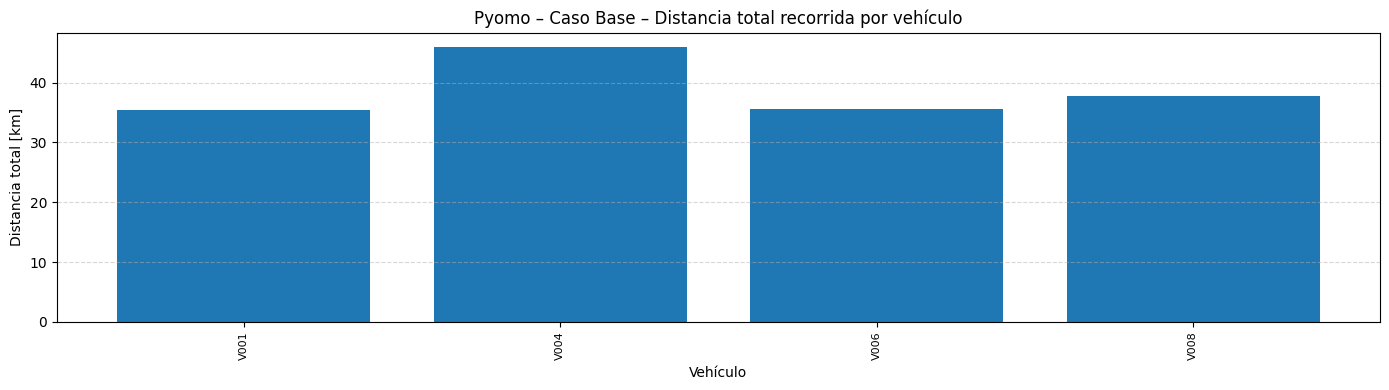

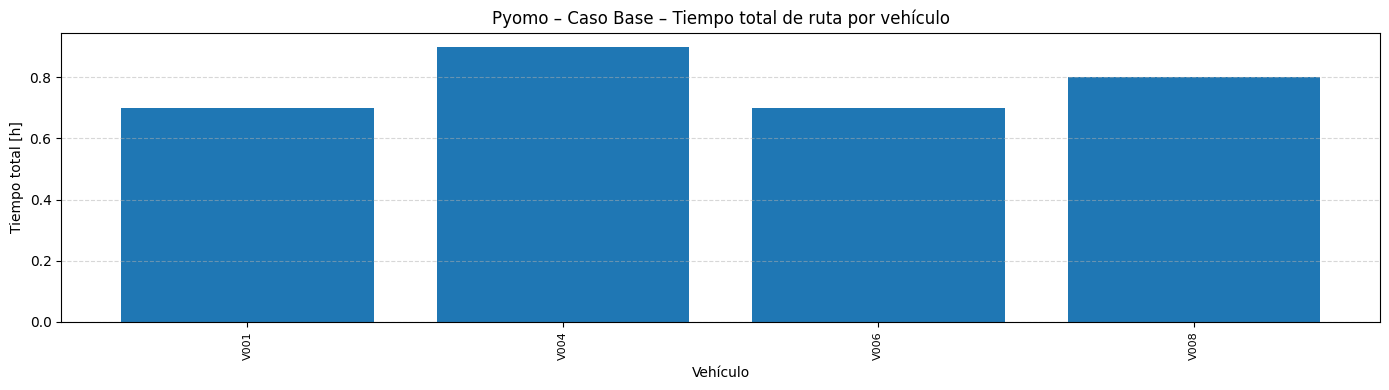

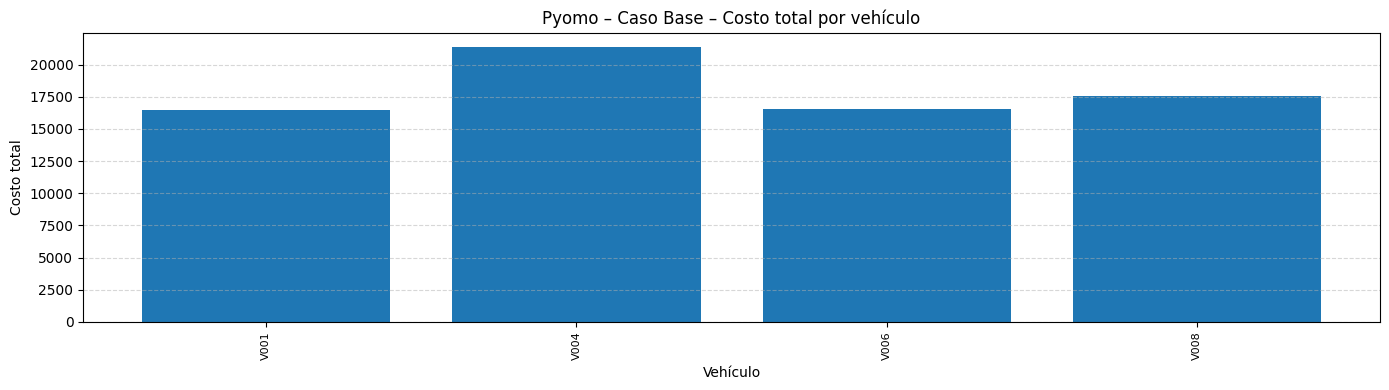

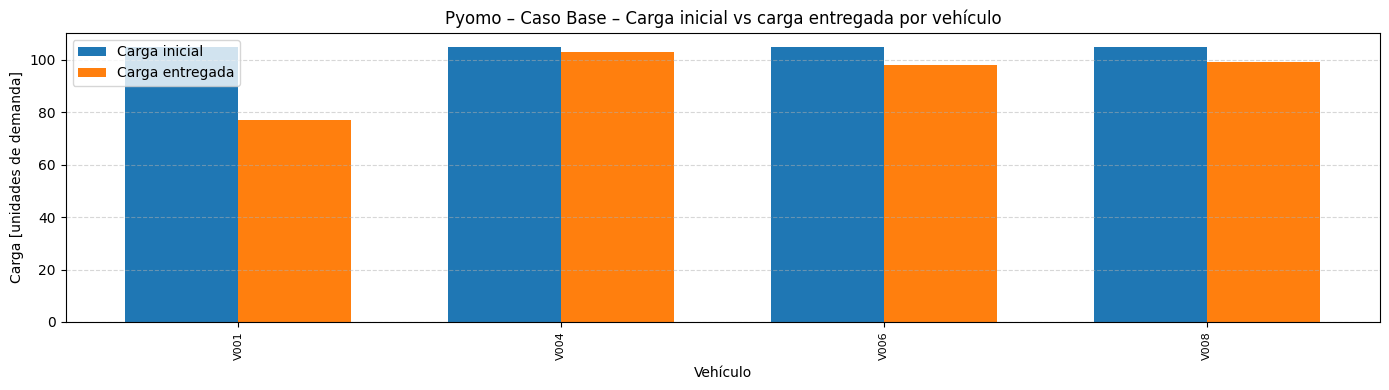

Mapa de rutas guardado en: mapa_rutas_Pyomo_caso_base.html


In [72]:
import pyomo.environ as pyo
import pandas as pd


depot_id_CB = depots_CB["StandardizedID"].iloc[0]
C_fixed_CB, C_dist_CB, C_time_CB, C_fuel_CB = get_cost_parameters(parameters_C2)

model_CB = build_pyomo_cvrp_projectA(
    dist_df=dist_df_CB,
    clients_df=clients_CB,
    vehicles_df=vehicles_CB,
    C_fixed=C_fixed_CB,
    C_dist=C_dist_CB,
    C_time=C_time_CB,
    C_fuel_per_km=C_fuel_CB,
    avg_speed_kmh=50,
    depot_id=depot_id_CB
)

solver_CB = pyo.SolverFactory("gurobi")
solver_CB.options['TimeLimit'] = 1200
solver_CB.options['MIPGap']   = 0.01 
results_CB = solver_CB.solve(model_CB, tee=True)
print(results_CB.solver.status, results_CB.solver.termination_condition)

verificacion_CB = build_verification_from_pyomo(
    model=model_CB,
    dist_df=dist_df_CB,
    clients_df=clients_CB,
    vehicles_df=vehicles_CB,
    depot_id=depot_id_CB,
    C_fuel_per_km=C_fuel_CB,
    avg_speed_kmh=50.0,
    costoFijo=C_fixed_CB
)

verificacion_CB = verificacion_CB[verificacion_CB["ClientsServed"] > 0].reset_index(drop=True)
display(verificacion_CB)
verificacion_CB.to_csv("verificacion_caso_base.csv", index=False)

plot_verification_report(
    verif_csv="verificacion_caso_base.csv",
    case_name="Pyomo – Caso Base",
    depots_df=depots_CB,     
    clients_df=clients_CB,    
    depot_id=depot_id_CB,    
    map_html="mapa_rutas_Pyomo_caso_base.html"
)

#### Caso 2

Read LP format model from file C:\Users\msant\AppData\Local\Temp\tmp0ia_3396.pyomo.lp
Reading time = 0.01 seconds
x1: 573 rows, 600 columns, 3582 nonzeros
Set parameter TimeLimit to value 1200
Set parameter MIPGap to value 0.01
Gurobi Optimizer version 12.0.3 build v12.0.3rc0 (win64 - Windows 11+.0 (26200.2))

CPU model: AMD Ryzen 5 8640HS w/ Radeon 760M Graphics, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Non-default parameters:
TimeLimit  1200
MIPGap  0.01

Optimize a model with 573 rows, 600 columns and 3582 nonzeros
Model fingerprint: 0xa2f77729
Variable types: 54 continuous, 546 integer (546 binary)
Coefficient statistics:
  Matrix range     [1e+00, 7e+01]
  Objective range  [2e+03, 6e+04]
  Bounds range     [1e+00, 7e+01]
  RHS range        [1e+00, 6e+01]
Presolve removed 54 rows and 0 columns
Presolve time: 0.02s
Presolved: 519 rows, 600 columns, 6079 nonzeros
Variable types: 54 continuous, 546 integer (5

,VehicleId,DepotId,InitialLoad,RouteSequence,ClientsServed,DemandsSatisfied,TotalDistance,TotalTime,FuelCost,TotalCost
0,V003,CD01,68.0,CD01-C005-C007-C008-C003-CD01,4,42,31.2,0.6,14513.0,64513.305822
1,V006,CD01,68.0,CD01-C006-C004-C001-C002-C009-CD01,5,59,41.6,0.8,19380.0,69380.131929


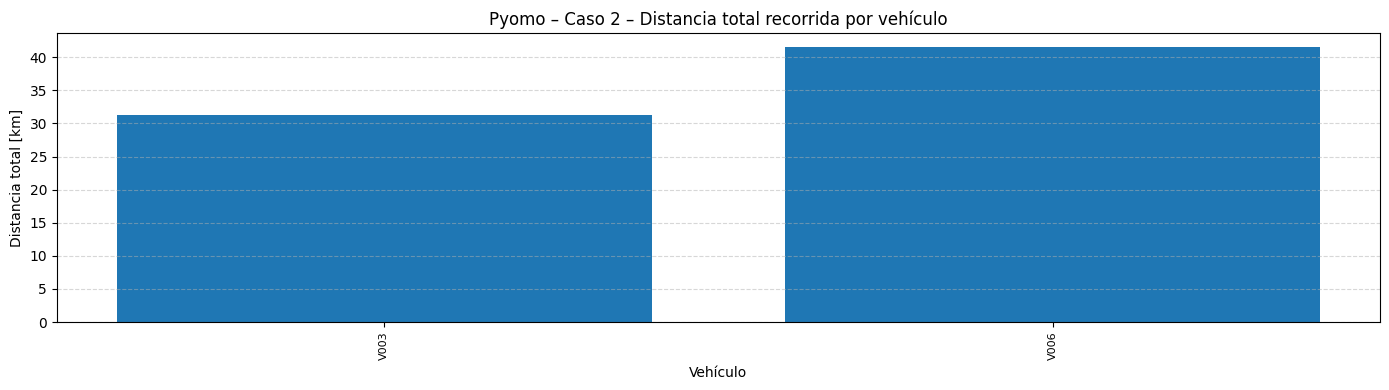

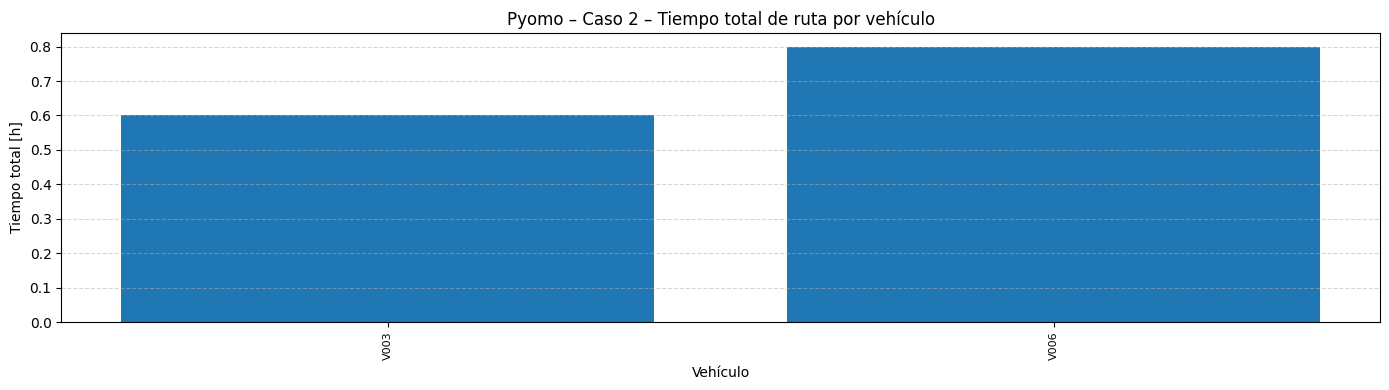

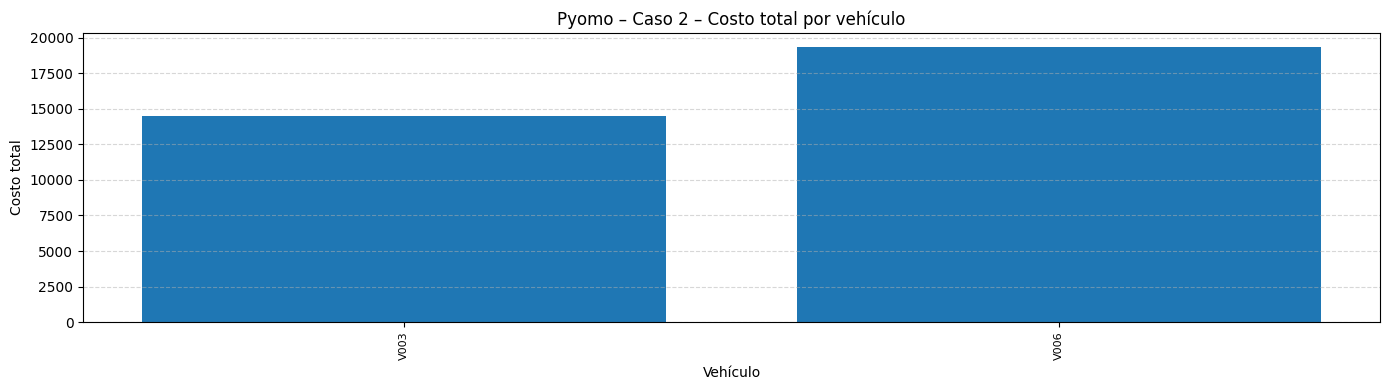

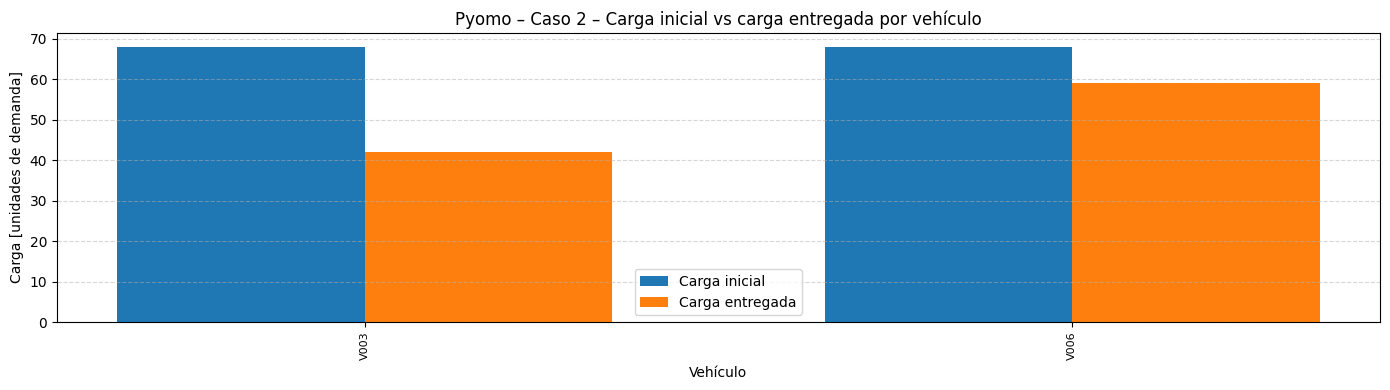

Mapa de rutas guardado en: mapa_rutas_Pyomo_caso_2.html


In [71]:
C_fixed_C2, C_dist_C2, C_time_C2, C_fuel_C2 = get_cost_parameters(parameters_C2)

model_C2 = build_pyomo_cvrp_projectA(
    dist_df=dist_df_C2,
    clients_df=clients_C2,
    vehicles_df=vehicles_C2,
    C_fixed=C_fixed_C2,
    C_dist=C_dist_C2,
    C_time=C_time_C2,
    C_fuel_per_km=C_fuel_C2,
    avg_speed_kmh=50,
    depot_id=depot_id_CB
)


solver_C2 = pyo.SolverFactory("gurobi")
solver_C2.options['TimeLimit'] = 1200 
solver_C2.options['MIPGap']   = 0.01 
results_C2 = solver_C2.solve(model_C2, tee=True)
print(results_C2.solver.status, results_C2.solver.termination_condition)

verificacion_C2 = build_verification_from_pyomo(
    model=model_C2,
    dist_df=dist_df_C2,
    clients_df=clients_C2,
    vehicles_df=vehicles_C2,
    depot_id=depot_id_CB,
    C_fuel_per_km=C_fuel_C2,
    avg_speed_kmh=50.0,
    costoFijo=C_fixed_C2
)

verificacion_C2 = verificacion_C2[verificacion_C2["ClientsServed"] > 0].reset_index(drop=True)
display(verificacion_C2)
verificacion_C2.to_csv("verificacion_caso2.csv", index=False)

plot_verification_report(
    verif_csv="verificacion_caso2.csv",
    case_name="Pyomo – Caso 2",
    depots_df=depot_C2,     
    clients_df=clients_C2,   
    depot_id=depot_id_CB,     
    map_html="mapa_rutas_Pyomo_caso_2.html"
)

#### Caso 3

Read LP format model from file C:\Users\msant\AppData\Local\Temp\tmpa99ox1gu.pyomo.lp
Reading time = 3.12 seconds
x1: 368820 rows, 372645 columns, 2563785 nonzeros
Set parameter TimeLimit to value 1200
Set parameter MIPGap to value 0.01
Gurobi Optimizer version 12.0.3 build v12.0.3rc0 (win64 - Windows 11+.0 (26200.2))

CPU model: AMD Ryzen 5 8640HS w/ Radeon 760M Graphics, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Non-default parameters:
TimeLimit  1200
MIPGap  0.01

Optimize a model with 368820 rows, 372645 columns and 2563785 nonzeros
Model fingerprint: 0x85e5221e
Variable types: 4050 continuous, 368595 integer (368595 binary)
Coefficient statistics:
  Matrix range     [1e+00, 9e+01]
  Objective range  [2e+02, 1e+05]
  Bounds range     [1e+00, 8e+01]
  RHS range        [1e+00, 8e+01]
Presolve removed 4095 rows and 0 columns (presolve time = 5s)...
Presolve removed 4095 rows and 0 columns
Presolve time: 5.10s


,VehicleId,DepotId,InitialLoad,RouteSequence,ClientsServed,DemandsSatisfied,TotalDistance,TotalTime,FuelCost
0,V001,CD01,83.0,CD01-C036-C008-C088-C060-C028-CD01,5,56,46.3,0.9,21562.0
1,V003,CD01,83.0,CD01-C018-C022-C079-C070-C068-C027-C080-CD01,7,77,45.6,0.9,21228.0
2,V011,CD01,83.0,CD01-C013-C019-C064-C042-C033-CD01,5,56,31.6,0.6,14740.0
3,V012,CD01,83.0,CD01-C058-C066-C002-C063-C081-C082-CD01,6,75,36.1,0.7,16826.0
4,V013,CD01,83.0,CD01-C078-C015-C034-C023-C089-C073-CD01,6,83,42.2,0.8,19656.0
5,V017,CD01,83.0,CD01-C071-C017-C003-C059-C056-C037-CD01,6,76,42.8,0.9,19943.0
6,V018,CD01,83.0,CD01-C090-C012-C041-C072-C026-C011-CD01,6,72,37.9,0.8,17655.0
7,V020,CD01,83.0,CD01-C010-C014-C057-C044-C062-C032-CD01,6,82,31.3,0.6,14594.0
8,V021,CD01,83.0,CD01-C049-C061-C009-C029-C021-CD01,5,61,18.3,0.4,8503.0
9,V031,CD01,83.0,CD01-C001-C075-CD01,2,25,15.8,0.3,7370.0


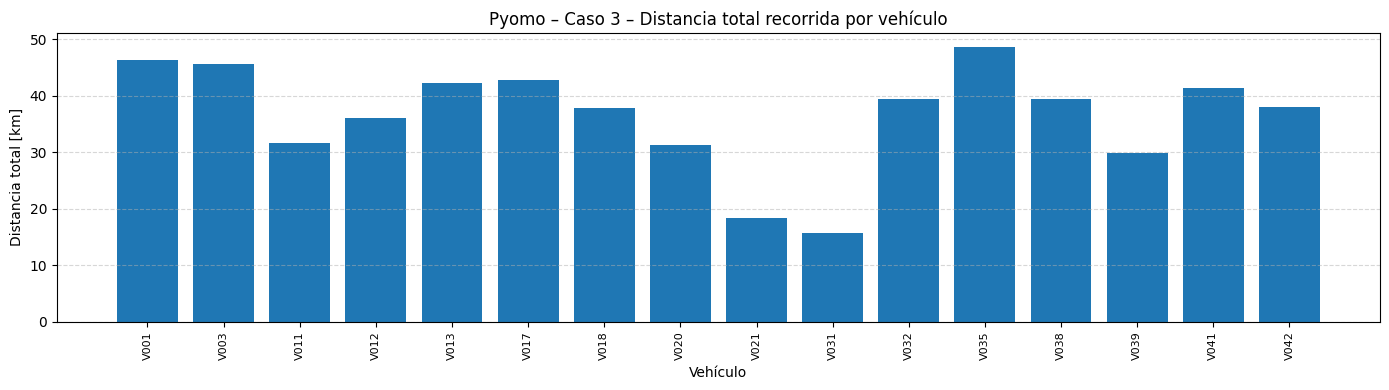

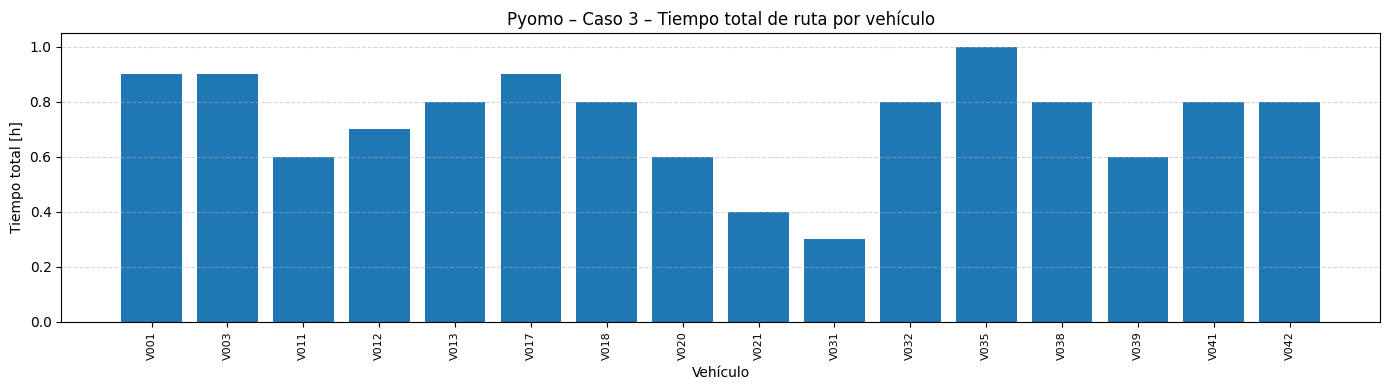

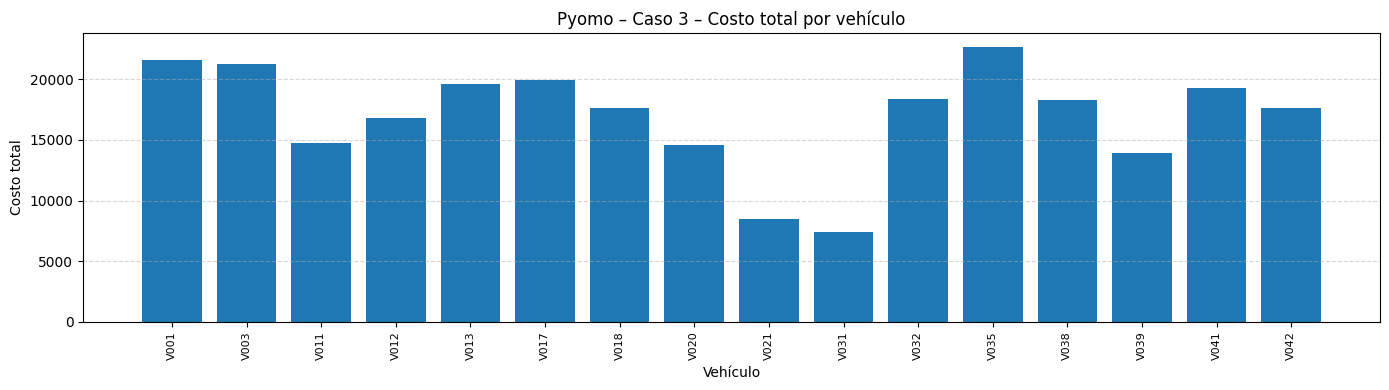

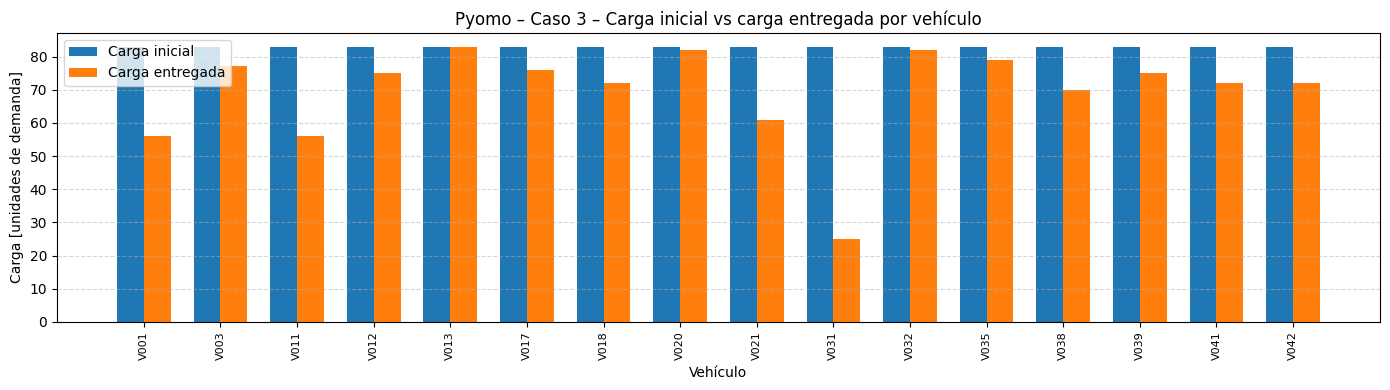

Mapa de rutas guardado en: mapa_rutas_Pyomo_caso_3.html


In [ ]:
C_fixed_C3, C_dist_C3, C_time_C3, C_fuel_C3 = get_cost_parameters(parameters_C3)

model_C3 = build_pyomo_cvrp_projectA(
    dist_df=dist_df_C3,
    clients_df=clients_C3,
    vehicles_df=vehicles_C3,
    C_fixed=C_fixed_C3,
    C_dist=C_dist_C3,
    C_time=C_time_C3,
    C_fuel_per_km=C_fuel_C3,
    avg_speed_kmh=50,
    depot_id=depot_id_CB  
)

solver_C3 = pyo.SolverFactory("gurobi")
solver_C3.options['TimeLimit'] = 1200  
solver_C3.options['MIPGap']   = 0.01 
results_C3 = solver_C3.solve(model_C3, tee=True)
print(results_C3.solver.status, results_C3.solver.termination_condition)


verificacion_C3 = build_verification_from_pyomo(
    model=model_C3,
    dist_df=dist_df_C3,
    clients_df=clients_C3,
    vehicles_df=vehicles_C3,
    depot_id=depot_id_CB,
    C_fuel_per_km=C_fuel_C3,
    avg_speed_kmh=50.0,
    costoFijo = C_fixed_C3
)

verificacion_C3 = verificacion_C3[verificacion_C3["ClientsServed"] > 0].reset_index(drop=True)
display(verificacion_C3)
verificacion_C3.to_csv("verificacion_caso3.csv", index=False)

plot_verification_report(
    verif_csv="verificacion_caso3.csv",
    case_name="Pyomo – Caso 3",
    depots_df=depot_C3,     
    clients_df=clients_C3,   
    depot_id=depot_id_CB,     
    map_html="mapa_rutas_Pyomo_caso_3.html"
)

## Metodo Metaheurístico: Algoritmo Genético

In [54]:
import pandas as pd


def build_idx_to_label_map(dist_df):
    labels = list(dist_df.index)           # [CD01, C001, C002, ...]
    idx_to_label = {i + 1: lab for i, lab in enumerate(labels)}
    return idx_to_label


def build_verification_from_ga(ga,
                               idx_to_label,
                               vehicles_df,
                               depot_label,
                               avg_speed_kmh=None):

    if ga.best_solution is None:
        raise ValueError("El GA aún no tiene solución.")

    if avg_speed_kmh is None:
        avg_speed_kmh = ga.avg_speed_kmh

    rows = []

    for v_idx, route in enumerate(ga.best_solution, start=1):
        veh_row   = vehicles_df.iloc[v_idx - 1]
        veh_label = veh_row["StandardizedID"]
        init_load = float(veh_row["Capacity"])

        route_labels = [idx_to_label[i] for i in route]
        total_dist = ga._route_distance(route)               
        total_time = total_dist / avg_speed_kmh if avg_speed_kmh > 0 else 0.0
        fuel_cost  = ga.C_fuel_per_km * total_dist

        cotsoRuta =    ga._route_cost( route)

        clients_served    = len(route)
        demand_satisfied  = sum(ga.demands.get(i, 0.0) for i in route)

        if route_labels:
            route_seq = "-".join([depot_label] + route_labels + [depot_label])
        else:
            route_seq = f"{depot_label}-{depot_label}"

        rows.append({
            "VehicleId":        veh_label,
            "DepotId":          depot_label,
            "InitialLoad":      init_load,
            "RouteSequence":    route_seq,
            "ClientsServed":    clients_served,
            "DemandsSatisfied": demand_satisfied,
            "TotalDistance":    round(total_dist, 1),
            "TotalTime":        round(total_time, 1),
            "FuelCost":         round(fuel_cost, 0),
            "TotalCost": round(cotsoRuta, 0)
        })


    verif_df = pd.DataFrame(rows)
    return verif_df



In [55]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import random
import time
from collections import defaultdict
from copy import deepcopy

class GeneticAlgorithmCVRP:

    def __init__(self, cost_matrix, demands, vehicle_capacity, num_customers, num_vehicles, C_fixed, C_dist, C_time, C_fuel_per_km, 
                 depots=None, population_size=100, generations=500, mutation_rate=0.2, crossover_rate=0.8, elitism_rate=0.1, tournament_size=5, 
                 avg_speed_kmh=50, capacity_penalty=1e4  
    ):
        self.cost_matrix = np.array(cost_matrix)
        self.num_nodes = int(num_customers)
        self.num_vehicles = int(num_vehicles)
        self.depots = list(depots)

        self.non_depots = [i for i in range(1, self.num_nodes + 1)
                           if i not in self.depots]

        if isinstance(demands, dict):
            self.demands = {int(k): float(v) for k, v in demands.items()}
        else:
            self.demands = {int(idx): float(val)
                            for idx, val in dict(demands).items()}

        self.Q = float(vehicle_capacity)

        # Hiperparametros GA
        self.population_size = population_size
        self.generations = generations
        self.mutation_rate = mutation_rate
        self.crossover_rate = crossover_rate
        self.elitism_rate = elitism_rate
        self.tournament_size = tournament_size

        # Coeficientes de costo
        self.C_fixed = float(C_fixed)
        self.C_dist = float(C_dist)
        self.C_time = float(C_time)
        self.C_fuel_per_km = float(C_fuel_per_km)
        self.avg_speed_kmh = float(avg_speed_kmh)
        self.capacity_penalty = float(capacity_penalty)

        # Resultados
        self.population = []
        self.best_solution = None
        self.best_fitness = float("inf")
        self.fitness_history = []
        self.best_solution_history = []

    # Inicializacion
    def initialize_population(self):
        population = []
        for _ in range(self.population_size):
            sol = self._create_random_solution()
            population.append(sol)
        self.population = population
        return population

    def _create_random_solution(self):
        cities = self.non_depots.copy()
        random.shuffle(cities)

        routes = [[] for _ in range(self.num_vehicles)]

        if random.random() < 0.5:
            base = len(cities) // self.num_vehicles
            rem = len(cities) % self.num_vehicles
            start = 0
            for k in range(self.num_vehicles):
                extra = 1 if k < rem else 0
                end = start + base + extra
                routes[k] = cities[start:end]
                start = end
        else:
            min_cities = min(1, len(cities) // self.num_vehicles) if self.num_vehicles > 0 else 0
            for k in range(self.num_vehicles):
                if len(cities) >= min_cities:
                    routes[k] = cities[:min_cities]
                    cities = cities[min_cities:]
            while cities:
                k = random.randint(0, self.num_vehicles - 1)
                routes[k].append(cities.pop(0))

        for k in range(self.num_vehicles):
            if len(routes[k]) > 3:
                routes[k] = self._random_2opt(routes[k])

        return routes

    def _random_2opt(self, route, iterations=5):
        best_route = route.copy()
        best_cost = self._route_cost(best_route)

        for _ in range(iterations):
            if len(best_route) < 4:
                break
            i, j = sorted(random.sample(range(len(best_route)), 2))
            new_route = best_route[:i] + best_route[i:j+1][::-1] + best_route[j+1:]
            new_cost = self._route_cost(new_route)
            if new_cost < best_cost:
                best_route, best_cost = new_route, new_cost

        return best_route

    # Cargas y costos
    def _route_load(self, route):
        return sum(self.demands.get(c, 0.0) for c in route)

    def _route_distance(self, route):
        if not route:
            return 0.0
        depot = self.depots[0]
        dist = self.cost_matrix[depot-1, route[0]-1]
        for i in range(len(route) - 1):
            dist += self.cost_matrix[route[i]-1, route[i+1]-1]
        dist += self.cost_matrix[route[-1]-1, depot-1]
        return float(dist)

    def _route_time(self, distance):
        if self.avg_speed_kmh <= 0:
            return 0.0
        return distance / self.avg_speed_kmh

    def _route_cost(self, route):
        if not route:
            return 0.0

        d = self._route_distance(route)
        t = self._route_time(d)
        fuel_cost = self.C_fuel_per_km * d

        variable = self.C_dist * d + self.C_time * t + fuel_cost
        return self.C_fixed + variable

    def evaluate_fitness(self, solution):
        total_cost = 0.0
        penalty = 0.0

        for route in solution:
            total_cost += self._route_cost(route)
            load = self._route_load(route)
            if load > self.Q:
                excess = load - self.Q
                penalty += self.capacity_penalty * excess

        return total_cost + penalty


    # Reparacion
    def _repair_solution(self, solution):
        included = []
        for r in solution:
            included.extend(r)

        city_pos = defaultdict(list)
        for r_idx, r in enumerate(solution):
            for pos, city in enumerate(r):
                city_pos[city].append((r_idx, pos))

        duplicates = {c: pos for c, pos in city_pos.items() if len(pos) > 1}
        missing = [c for c in self.non_depots if c not in included]

        to_remove = []
        for c, positions in duplicates.items():
            for r_idx, pos in positions[1:]:
                to_remove.append((r_idx, pos))
        to_remove.sort(reverse=True)
        for r_idx, pos in to_remove:
            solution[r_idx].pop(pos)

        random.shuffle(missing)
        for city in missing:
            sizes = [(i, len(r)) for i, r in enumerate(solution)]
            r_idx = min(sizes, key=lambda x: x[1])[0]
            insert_pos = random.randint(0, len(solution[r_idx]))
            solution[r_idx].insert(insert_pos, city)

        solution = self._repair_capacity(solution)
        return solution

    def _repair_capacity(self, solution):
        routes = deepcopy(solution)
        loads = [self._route_load(r) for r in routes]

        for v in range(self.num_vehicles):
            while loads[v] > self.Q and routes[v]:

                # Extraer ciudad mss demandante
                idx_city = max(range(len(routes[v])),
                            key=lambda idx: self.demands.get(routes[v][idx], 0.0))

                city = routes[v].pop(idx_city)
                demand_city = self.demands[city]
                loads[v] -= demand_city

                # Buscar mejor vehiculo receptor
                best_v = None
                best_space = -1

                for k in range(self.num_vehicles):
                    space = self.Q - loads[k]
                    if space >= demand_city and space > best_space:
                        best_space = space
                        best_v = k

                # Si ninguno cabe manda al vehículo mas vacio (sin importar si se sobrecarga)
                if best_v is None:
                    best_v = min(range(self.num_vehicles), key=lambda k: loads[k])

                routes[best_v].append(city)
                loads[best_v] += demand_city

        return routes

    # Seleccion, crossover y mutacion 

    def select_parents(self):
        def tournament():
            participants = random.sample(range(len(self.population)), self.tournament_size)
            fits = [(p, self.evaluate_fitness(self.population[p])) for p in participants]
            winner_idx = min(fits, key=lambda x: x[1])[0]
            return self.population[winner_idx]
        return tournament(), tournament()

    def _remove_duplicates(self, route):
        seen, res = set(), []
        for c in route:
            if c not in seen:
                seen.add(c)
                res.append(c)
        return res

    def _route_exchange_crossover(self, p1, p2):
        c1, c2 = deepcopy(p1), deepcopy(p2)
        if self.num_vehicles < 2:
            return c1, c2

        k = random.randint(1, max(1, self.num_vehicles // 2))
        idxs = random.sample(range(self.num_vehicles), k)
        for i in idxs:
            c1[i], c2[i] = c2[i], c1[i]

        c1 = self._repair_solution(c1)
        c2 = self._repair_solution(c2)
        return c1, c2

    def _route_merge_crossover(self, p1, p2):
        c1 = [[] for _ in range(self.num_vehicles)]
        c2 = [[] for _ in range(self.num_vehicles)]
        for k in range(self.num_vehicles):
            if p1[k] and p2[k]:
                p1c = random.randint(0, len(p1[k]))
                p2c = random.randint(0, len(p2[k]))
                merged1 = p1[k][:p1c] + p2[k][p2c:]
                merged2 = p2[k][:p2c] + p1[k][p1c:]
                c1[k] = self._remove_duplicates(merged1)
                c2[k] = self._remove_duplicates(merged2)
        c1 = self._repair_solution(c1)
        c2 = self._repair_solution(c2)
        return c1, c2

    def crossover(self, parent1, parent2):
        if random.random() > self.crossover_rate:
            return deepcopy(parent1), deepcopy(parent2)
        if random.random() < 0.5:
            return self._route_exchange_crossover(parent1, parent2)
        else:
            return self._route_merge_crossover(parent1, parent2)

    def _swap_mutation(self, sol):
        m = deepcopy(sol)
        candidates = [i for i, r in enumerate(m) if len(r) >= 2]
        if not candidates:
            return m
        r_idx = random.choice(candidates)
        r = m[r_idx]
        i, j = random.sample(range(len(r)), 2)
        r[i], r[j] = r[j], r[i]
        return m

    def _insert_mutation(self, sol):
        m = deepcopy(sol)
        candidates = [i for i, r in enumerate(m) if len(r) >= 2]
        if not candidates:
            return m
        r_idx = random.choice(candidates)
        r = m[r_idx]
        old = random.randint(0, len(r) - 1)
        new = random.randint(0, len(r) - 1)
        while new == old:
            new = random.randint(0, len(r) - 1)
        city = r.pop(old)
        r.insert(new, city)
        return m

    def _inversion_mutation(self, sol):
        m = deepcopy(sol)
        candidates = [i for i, r in enumerate(m) if len(r) >= 3]
        if not candidates:
            return m
        r_idx = random.choice(candidates)
        r = m[r_idx]
        i, j = sorted(random.sample(range(len(r)), 2))
        m[r_idx] = r[:i] + r[i:j+1][::-1] + r[j+1:]
        return m

    def _redistribution_mutation(self, sol):
        m = deepcopy(sol)
        if self.num_vehicles < 2:
            return m
        non_empty = [i for i, r in enumerate(m) if r]
        if not non_empty:
            return m
        from_idx = random.choice(non_empty)
        to_idx = random.randint(0, self.num_vehicles - 1)
        while to_idx == from_idx:
            to_idx = random.randint(0, self.num_vehicles - 1)
        r_from = m[from_idx]
        pos = random.randint(0, len(r_from) - 1)
        city = r_from.pop(pos)
        insert_pos = random.randint(0, len(m[to_idx]))
        m[to_idx].insert(insert_pos, city)
        return m

    def mutate(self, solution):
        if random.random() > self.mutation_rate:
            return solution
        mtype = random.choice(["swap", "insert", "invert", "redistribute"])
        if mtype == "swap":
            mutated = self._swap_mutation(solution)
        elif mtype == "insert":
            mutated = self._insert_mutation(solution)
        elif mtype == "invert":
            mutated = self._inversion_mutation(solution)
        else:
            mutated = self._redistribution_mutation(solution)
        return self._repair_solution(mutated)

    # Evolucion

    def evolve_population(self):
        pop_fit = [(i, self.evaluate_fitness(sol))
                   for i, sol in enumerate(self.population)]
        pop_fit.sort(key=lambda x: x[1])

        num_elite = max(1, int(self.elitism_rate * self.population_size))
        elite_idx = [idx for idx, _ in pop_fit[:num_elite]]
        new_pop = [deepcopy(self.population[idx]) for idx in elite_idx]

        while len(new_pop) < self.population_size:
            p1, p2 = self.select_parents()
            c1, c2 = self.crossover(p1, p2)
            c1 = self.mutate(c1)
            c2 = self.mutate(c2)
            new_pop.append(c1)
            if len(new_pop) < self.population_size:
                new_pop.append(c2)

        self.population = new_pop

    def solve(self, verbose=True, early_stopping_generations=50, max_time_seconds=None):
        self.initialize_population()
        best_sol = None
        best_fit = float("inf")
        no_improve = 0
        t0 = time.time()

        for g in range(self.generations):
            if max_time_seconds is not None:
                elapsed = time.time() - t0
                if elapsed >= max_time_seconds:
                    if verbose:
                        print(f"Stopped by time limit: {elapsed:.1f}s (gen {g})")
                    break

            self.evolve_population()

            current_best = None
            current_best_fit = float("inf")
            for sol in self.population:
                f = self.evaluate_fitness(sol)
                if f < current_best_fit:
                    current_best_fit = f
                    current_best = sol

            if current_best_fit < best_fit:
                best_fit = current_best_fit
                best_sol = deepcopy(current_best)
                no_improve = 0
            else:
                no_improve += 1

            self.fitness_history.append(current_best_fit)
            self.best_solution_history.append(best_fit)

            if verbose and g % 10 == 0:
                elapsed = time.time() - t0
                print(f"Gen {g}: best={best_fit:.2f}, current={current_best_fit:.2f}, "
                    f"time={elapsed:.1f}s")

            if no_improve >= early_stopping_generations:
                if verbose:
                    print(f"Early stopping en gen {g}")
                break

        self.best_solution = best_sol
        self.best_fitness = best_fit

        if verbose:
            print(f"Terminado. Mejor fitness = {best_fit:.2f}")

        return best_sol, best_fit

    def plot_convergence(self):
        if not self.fitness_history:
            print("Aún no se ha ejecutado solve().")
            return
        plt.figure(figsize=(8, 5))
        plt.plot(self.fitness_history, label="Best gen")
        plt.plot(self.best_solution_history, label="Best global")
        plt.xlabel("Generación")
        plt.ylabel("Fitness")
        plt.grid(True)
        plt.legend()
        plt.tight_layout()
        plt.show()

    def get_solution_details(self):
        if self.best_solution is None:
            return "No hay solución. Ejecuta solve() primero."

        depot = self.depots[0]
        lines = [f"Mejor fitness: {self.best_fitness:.2f}", f"Depósito: {depot}\n"]
        total_cost = 0.0

        for k, route in enumerate(self.best_solution):
            if not route:
                lines.append(f"Vehículo {k+1}: ruta vacía.")
                continue

            nodes = [depot] + route + [depot]
            route_str = " -> ".join(str(n) for n in nodes)
            cost = self._route_cost(route)
            load = self._route_load(route)
            total_cost += cost
            lines.append(
                f"Vehículo {k+1}: {route_str} | Carga={load:.1f} | Costo={cost:.2f}"
            )

        lines.append(f"\nSuma de costos de rutas: {total_cost:.2f}")
        return "\n".join(lines)


In [56]:
from IPython.display import display

def run_ga_experiments(build_ga_fn, n_runs=3, base_seed=100, verbose=True):
    resultados = []

    for k in range(n_runs):
        seed = base_seed + k

        # Fijar semillas 
        random.seed(seed)
        np.random.seed(seed)

        # Construir el GA 
        ga = build_ga_fn(seed)

        # Medir tiempo de CPU
        t0 = time.perf_counter()
        best_sol, best_fit = ga.solve(verbose=True,
                              early_stopping_generations=20,
                              max_time_seconds=60) 
        t1 = time.perf_counter()
        cpu_time = t1 - t0

        resultados.append({
            "run": k + 1,
            "seed": seed,
            "best_fitness": best_fit,
            "cpu_time_sec": cpu_time,
        })

        if verbose:
            print(f"Run {k+1} | seed={seed} | best_fitness={best_fit:.2f} | "
                  f"time={cpu_time:.2f}s")

    df_results = pd.DataFrame(resultados)

    # Estadisticas
    print("\nResumen estadístico de la función objetivo (best_fitness):")
    print(f"  Mejor  (min) : {df_results['best_fitness'].min():.2f}")
    print(f"  Peor   (max) : {df_results['best_fitness'].max():.2f}")
    print(f"  Media        : {df_results['best_fitness'].mean():.2f}")
    print(f"  Desv. estándar: {df_results['best_fitness'].std(ddof=1):.2f}")
    print("\nResumen de tiempos de CPU (segundos):")
    print(f"  Media        : {df_results['cpu_time_sec'].mean():.2f}")
    print(f"  Desv. estándar: {df_results['cpu_time_sec'].std(ddof=1):.2f}")
    print(f"  Mínimo       : {df_results['cpu_time_sec'].min():.2f}")
    print(f"  Máximo       : {df_results['cpu_time_sec'].max():.2f}")

    display(df_results)  

    return df_results


#### Caso base

Gen 0: best=1155031.79, current=1155031.79, time=0.1s
Gen 10: best=979181.49, current=979181.49, time=0.9s
Gen 20: best=877633.07, current=877633.07, time=1.6s
Gen 30: best=840190.32, current=840190.32, time=2.3s
Gen 40: best=827563.05, current=827563.05, time=2.9s
Gen 50: best=811170.70, current=811170.70, time=3.6s
Gen 60: best=795876.04, current=795876.04, time=4.2s
Gen 70: best=785582.34, current=785582.34, time=4.8s
Gen 80: best=785548.76, current=785548.76, time=5.5s
Gen 90: best=724742.28, current=724742.28, time=6.2s
Gen 100: best=717786.53, current=717786.53, time=6.8s
Gen 110: best=717628.23, current=717628.23, time=7.5s
Gen 120: best=717408.41, current=717408.41, time=8.1s
Gen 130: best=717408.41, current=717408.41, time=8.7s
Early stopping en gen 137
Terminado. Mejor fitness = 717408.41
Run 1 | seed=100 | best_fitness=717408.41 | time=9.22s
Gen 0: best=1195997.27, current=1195997.27, time=0.1s
Gen 10: best=1091299.36, current=1091299.36, time=0.8s
Gen 20: best=971725.52, cu

,run,seed,best_fitness,cpu_time_sec
0,1,100,717408.408929,9.217655
1,2,101,771202.202261,8.186602
2,3,102,767112.670867,6.164075


,VehicleId,DepotId,InitialLoad,RouteSequence,ClientsServed,DemandsSatisfied,TotalDistance,TotalTime,FuelCost,TotalCost
0,V001,CD01,105.0,CD01-C005-C020-C023-C002-C019-C007-C022-CD01,7,100.0,50.3,1.0,23447.0,206967.0
1,V002,CD01,105.0,CD01-C018-C021-C012-CD01-C008-C011-CD01,6,100.0,62.5,1.2,29099.0,244800.0
2,V004,CD01,105.0,CD01-C017-C009-C024-C016-C010-CD01,5,82.0,21.5,0.4,9991.0,116888.0
3,V006,CD01,105.0,CD01-C015-C013-C003-C014-C006-C004-CD01,6,95.0,29.9,0.6,13923.0,143204.0


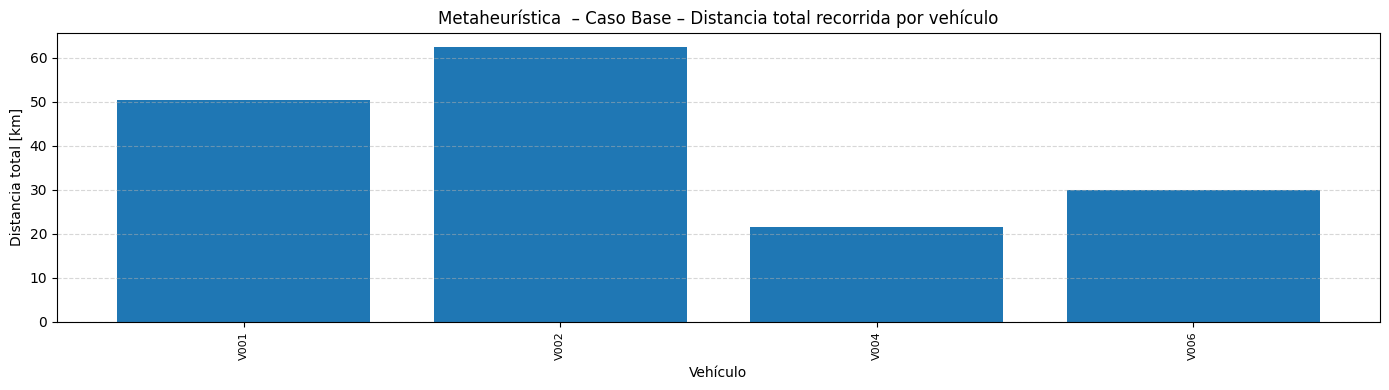

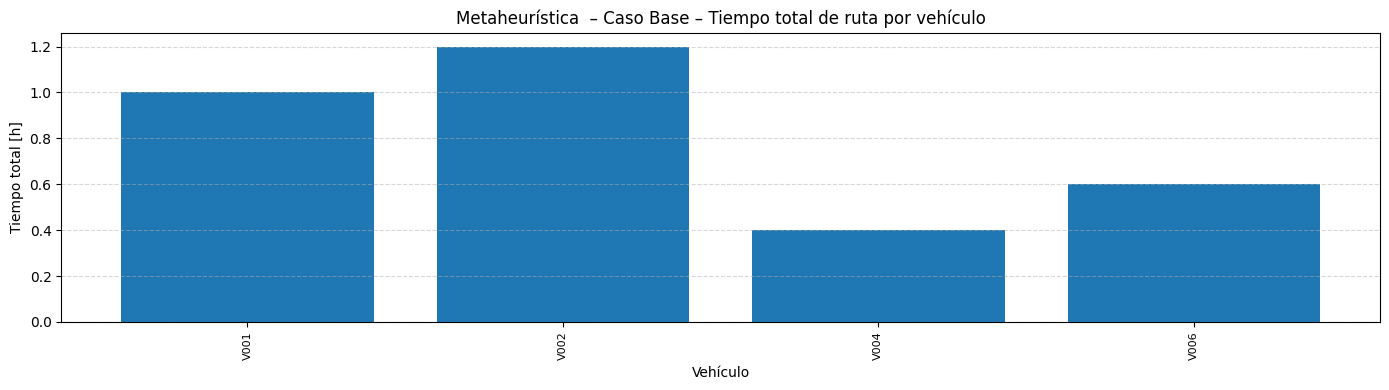

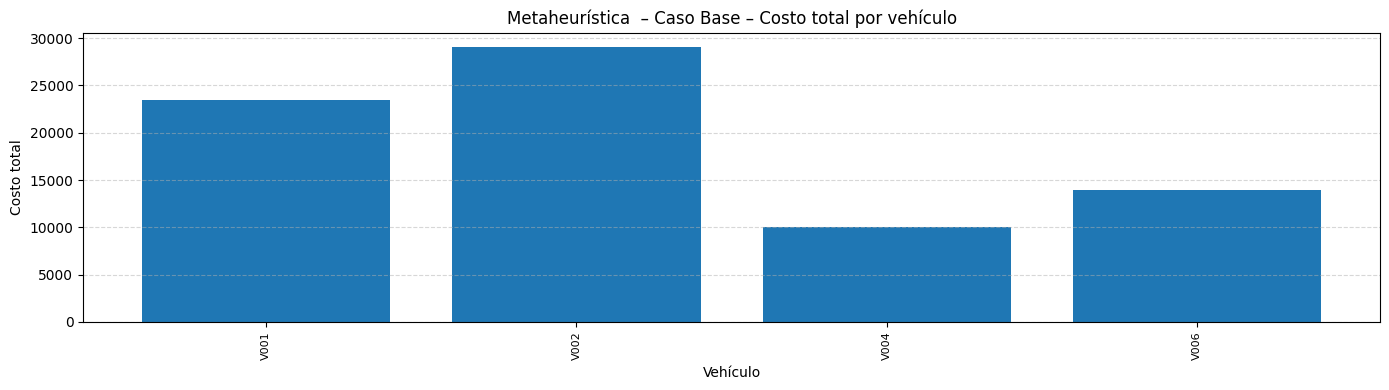

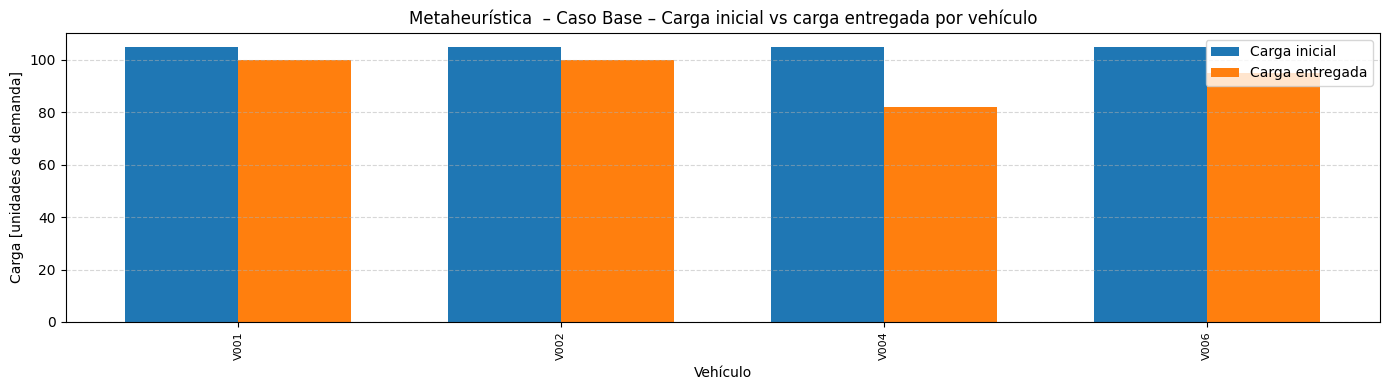

Mapa de rutas guardado en: mapa_rutas_Metaheuristica_caso_Base.html


In [57]:
C_fixed_A, C_dist_A, C_time_A, C_fuel_A = get_cost_parameters(parameters_C2)

demands_CB = dict(zip(clients_CB["LocationID"], clients_CB["Demand"]))

dist_df_CB      = pd.read_csv("Proyecto_Caso_Base/dist_matrix_CB.csv", index_col=0)
dist_matrix_CB  = dist_df_CB.values
num_nodes_CB    = dist_matrix_CB.shape[0]
num_vehicles_CB = len(vehicles_CB)

depot_id_CB = depots_CB["StandardizedID"].iloc[0]   
idx_to_label_CB = build_idx_to_label_map(dist_df_CB)

def build_ga_case_base(seed):
    random.seed(seed)
    np.random.seed(seed)
    ga = GeneticAlgorithmCVRP(
        cost_matrix=dist_matrix_CB,
        demands=demands_CB,
        vehicle_capacity=Q_base,          
        num_customers=num_nodes_CB,
        num_vehicles=num_vehicles_CB,
        C_fixed=C_fixed_A,
        C_dist=C_dist_A,
        C_time=C_time_A,
        C_fuel_per_km=C_fuel_A,
        depots=[1],                       
        population_size=200,
        generations=300,
        mutation_rate=0.2,
        crossover_rate=0.8,
        elitism_rate=0.1,
        tournament_size=5,
        avg_speed_kmh=50,
        capacity_penalty=1e4
    )
    return ga

# 3 corridas independientes
resultados_base = run_ga_experiments(
    build_ga_case_base,
    n_runs=3,
    base_seed=100,
    verbose=True
)

# mejor corrida (por fitness)
best_row_CB  = resultados_base.loc[resultados_base["best_fitness"].idxmin()]
best_seed_CB = int(best_row_CB["seed"])

ga_best_CB = build_ga_case_base(best_seed_CB)
t0 = time.time()
ga_best_CB.solve(verbose=False)
cpu_time_best_CB = time.time() - t0

verif_GA_CB = build_verification_from_ga(
    ga=ga_best_CB,
    idx_to_label=idx_to_label_CB,
    vehicles_df=vehicles_CB,
    depot_label=depot_id_CB,
    avg_speed_kmh=50.0
)

verif_GA_CB = verif_GA_CB[verif_GA_CB["ClientsServed"] > 0].reset_index(drop=True)
display(verif_GA_CB)
verif_GA_CB.to_csv("verificacion_metaheuristica_GA_A_casoBase.csv", index=False)

plot_verification_report(
    verif_csv="verificacion_metaheuristica_GA_A_casoBase.csv",
    case_name="Metaheurística  – Caso Base",
    depots_df=depots_CB,     
    clients_df=clients_CB,   
    depot_id=depot_id_CB,     
    map_html="mapa_rutas_Metaheuristica_caso_Base.html"
)


#### Caso 2

Gen 0: best=639020.75, current=639020.75, time=0.1s
Gen 10: best=329892.05, current=329892.05, time=0.4s
Gen 20: best=296584.21, current=296584.21, time=0.8s
Gen 30: best=296584.21, current=296584.21, time=1.1s
Early stopping en gen 37
Terminado. Mejor fitness = 296584.21
Run 1 | seed=200 | best_fitness=296584.21 | time=1.38s
Gen 0: best=616705.31, current=616705.31, time=0.0s
Gen 10: best=342414.37, current=342414.37, time=0.4s
Gen 20: best=296584.21, current=296584.21, time=0.8s
Gen 30: best=296584.21, current=296584.21, time=1.1s
Early stopping en gen 32
Terminado. Mejor fitness = 296584.21
Run 2 | seed=201 | best_fitness=296584.21 | time=1.18s
Gen 0: best=478003.33, current=478003.33, time=0.0s
Gen 10: best=351838.42, current=351838.42, time=0.4s
Gen 20: best=296584.21, current=296584.21, time=0.8s
Gen 30: best=296584.21, current=296584.21, time=1.1s
Gen 40: best=296584.21, current=296584.21, time=1.5s
Early stopping en gen 40
Terminado. Mejor fitness = 296584.21
Run 3 | seed=202 |

,run,seed,best_fitness,cpu_time_sec
0,1,200,296584.208025,1.384549
1,2,201,296584.208025,1.178474
2,3,202,296584.208025,1.453644


,VehicleId,DepotId,InitialLoad,RouteSequence,ClientsServed,DemandsSatisfied,TotalDistance,TotalTime,FuelCost,TotalCost
0,V001,CD01,68.0,CD01-C006-CD01-C005-C003-C008-C007-C009-CD01,7,68.0,50.5,1.0,23510.0,207386.0
1,V002,CD01,68.0,CD01-C004-C002-CD01,2,21.0,12.6,0.3,5855.0,89199.0


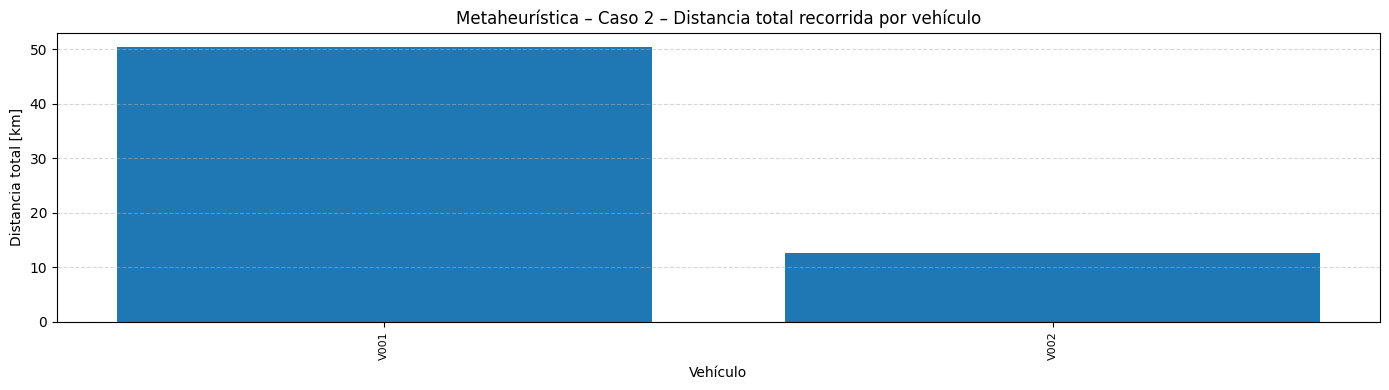

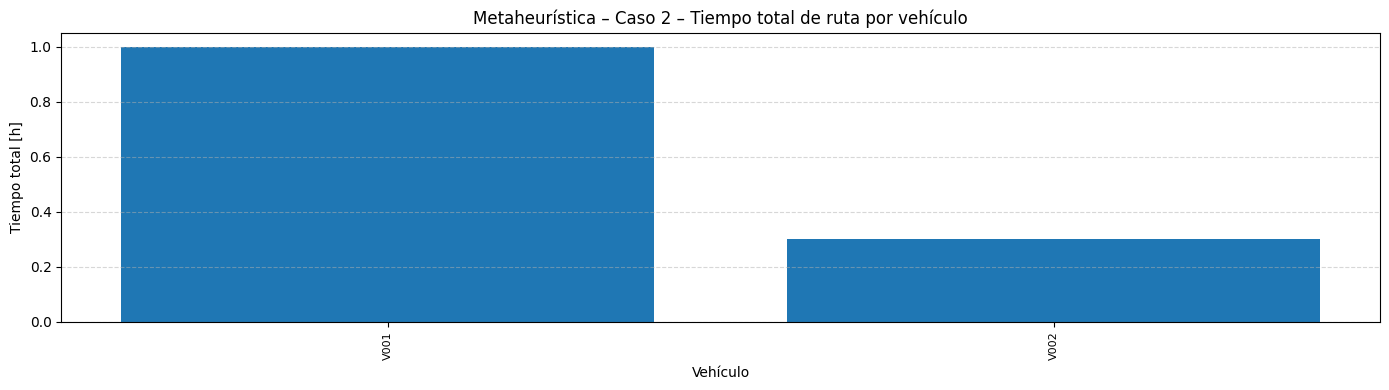

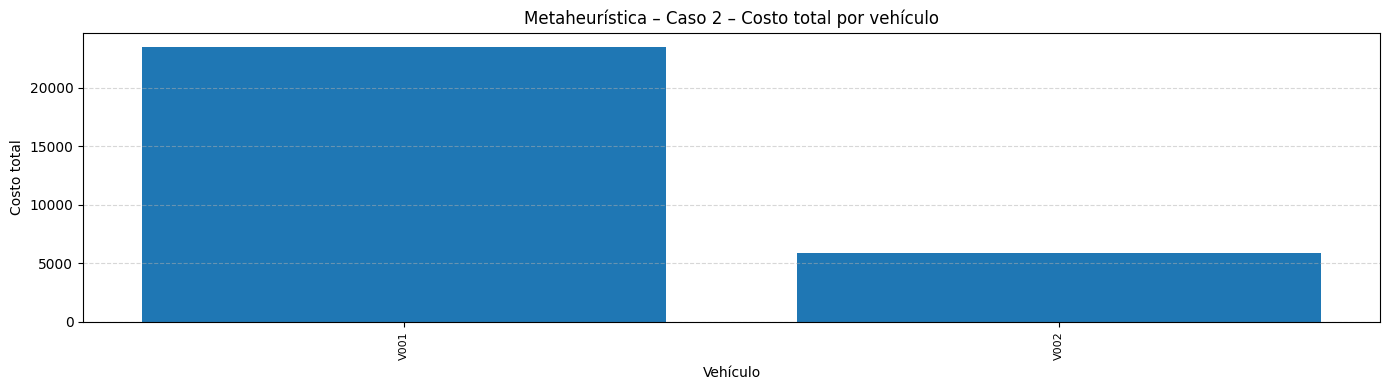

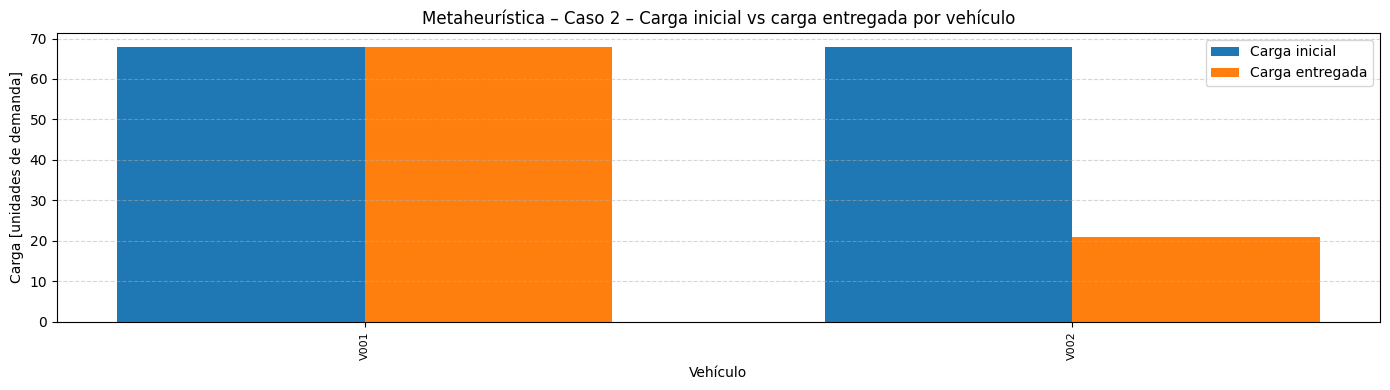

Mapa de rutas guardado en: mapa_rutas_Metaheuristica_caso_2.html


In [58]:
dist_df_C2      = pd.read_csv("Proyecto_A_Caso2/dist_matrix_C2.csv", index_col=0)
dist_matrix_C2  = dist_df_C2.values
num_nodes_C2    = dist_matrix_C2.shape[0]
num_vehicles_C2 = len(vehicles_C2)

idx_map_C2 = {label: i + 1 for i, label in enumerate(dist_df_C2.index)}

demands_C2 = {}
for _, row in clients_C2.iterrows():
    std_id = row["StandardizedID"]      
    ga_idx = idx_map_C2[std_id]        
    demands_C2[ga_idx] = float(row["Demand"])
depot_id_C2 = depots_CB["StandardizedID"].iloc[0]  
idx_to_label_C2 = build_idx_to_label_map(dist_df_C2)

def build_ga_case2(seed):
    random.seed(seed)
    np.random.seed(seed)
    ga = GeneticAlgorithmCVRP(
        cost_matrix=dist_matrix_C2,
        demands=demands_C2,
        vehicle_capacity=Q_2,
        num_customers=num_nodes_C2,
        num_vehicles=num_vehicles_C2,
        C_fixed=C_fixed_A,
        C_dist=C_dist_A,
        C_time=C_time_A,
        C_fuel_per_km=C_fuel_A,
        depots=[1],
        population_size=200,
        generations=300,
        mutation_rate=0.2,
        crossover_rate=0.8,
        elitism_rate=0.1,
        tournament_size=5,
        avg_speed_kmh=50,
        capacity_penalty=1e4
    )
    return ga

resultados_C2 = run_ga_experiments(
    build_ga_case2,
    n_runs=3,
    base_seed=200,
    verbose=True
)

best_row_C2  = resultados_C2.loc[resultados_C2["best_fitness"].idxmin()]
best_seed_C2 = int(best_row_C2["seed"])

ga_best_C2 = build_ga_case2(best_seed_C2)
t0 = time.time()
ga_best_C2.solve(verbose=False)
cpu_time_best_C2 = time.time() - t0

verif_GA_C2 = build_verification_from_ga(
    ga=ga_best_C2,
    idx_to_label=idx_to_label_C2,
    vehicles_df=vehicles_C2,
    depot_label=depot_id_C2,
    avg_speed_kmh=50.0
)

verif_GA_C2 = verif_GA_C2[verif_GA_C2["ClientsServed"] > 0].reset_index(drop=True)
display(verif_GA_C2)
verif_GA_C2.to_csv("verificacion_metaheuristica_GA_A_caso2.csv", index=False)

plot_verification_report(
    verif_csv="verificacion_metaheuristica_GA_A_caso2.csv",
    case_name="Metaheurística – Caso 2",
    depots_df=depot_C2,     
    clients_df=clients_C2,   
    depot_id=depot_id_CB,     
    map_html="mapa_rutas_Metaheuristica_caso_2.html"
)


#### Caso 3

Gen 0: best=6259158.97, current=6259158.97, time=0.4s
Gen 10: best=5928694.46, current=5928694.46, time=3.9s
Gen 20: best=5644107.55, current=5644107.55, time=7.5s
Gen 30: best=5409519.11, current=5409519.11, time=11.0s
Gen 40: best=4976294.77, current=4976294.77, time=14.5s
Gen 50: best=4829824.49, current=4829824.49, time=17.7s
Gen 60: best=4638556.38, current=4638556.38, time=20.8s
Gen 70: best=4532178.53, current=4532178.53, time=24.1s
Gen 80: best=4348115.06, current=4348115.06, time=27.3s
Gen 90: best=4212130.10, current=4212130.10, time=30.5s
Gen 100: best=4117975.54, current=4117975.54, time=33.8s
Gen 110: best=4005095.25, current=4005095.25, time=37.0s
Gen 120: best=3993230.76, current=3993230.76, time=40.3s
Gen 130: best=3970602.90, current=3970602.90, time=43.6s
Gen 140: best=3858293.35, current=3858293.35, time=48.4s
Gen 150: best=3755513.92, current=3755513.92, time=51.3s
Gen 160: best=3690691.99, current=3690691.99, time=54.3s
Gen 170: best=3553333.93, current=3553333.93,

,run,seed,best_fitness,cpu_time_sec
0,1,300,3.517234e+06,60.279869
1,2,301,3.716612e+06,60.098928
2,3,302,3.584359e+06,60.328160


,VehicleId,DepotId,InitialLoad,RouteSequence,ClientsServed,DemandsSatisfied,TotalDistance,TotalTime,FuelCost,TotalCost
0,V001,CD01,83.0,CD01-C056-C027-C053-C054-C028-CD01,5,60.0,30.6,0.6,14273.0,145549.0
1,V003,CD01,83.0,CD01-C057-C041-C081-C067-C078-CD01,5,66.0,28.8,0.6,13419.0,139833.0
2,V005,CD01,83.0,CD01-C035-CD01,1,12.0,22.4,0.4,10424.0,119781.0
3,V006,CD01,83.0,CD01-C038-C034-C016-C051-C087-CD01,5,62.0,27.6,0.6,12843.0,135975.0
4,V007,CD01,83.0,CD01-C023-C037-C022-C088-C048-C013-CD01,6,75.0,33.5,0.7,15594.0,154396.0
5,V008,CD01,83.0,CD01-C070-C083-C086-C024-C050-CD01,5,56.0,38.8,0.8,18058.0,170890.0
6,V009,CD01,83.0,CD01-C011-C005-C077-C031-C044-C032-CD01,6,51.0,42.6,0.9,19831.0,182757.0
7,V010,CD01,83.0,CD01-C071-C058-C009-CD01,3,24.0,28.0,0.6,13060.0,137431.0
8,V011,CD01,83.0,CD01-C015-C080-C025-C018-C060-CD01,5,67.0,40.3,0.8,18780.0,175725.0
9,V012,CD01,83.0,CD01-C021-C020-C012-CD01,3,48.0,27.1,0.5,12623.0,134504.0


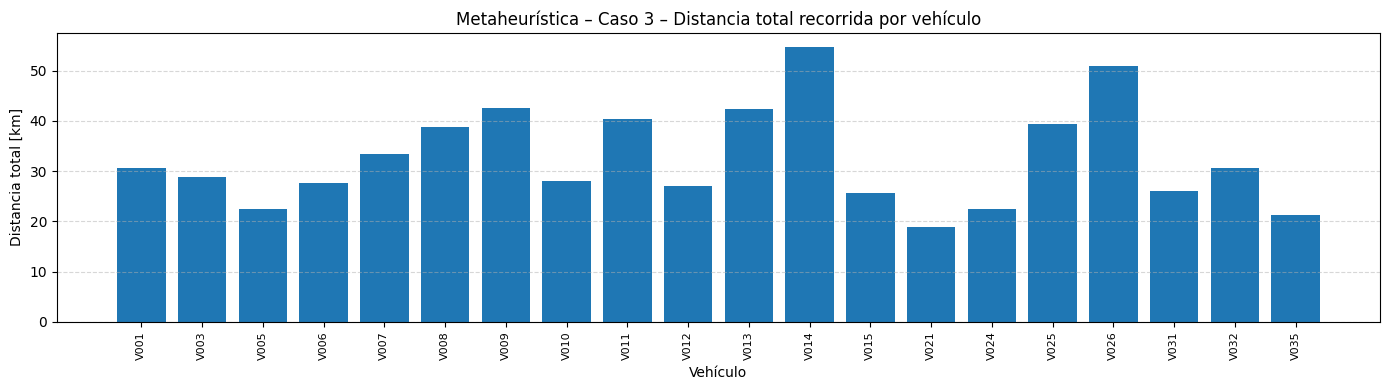

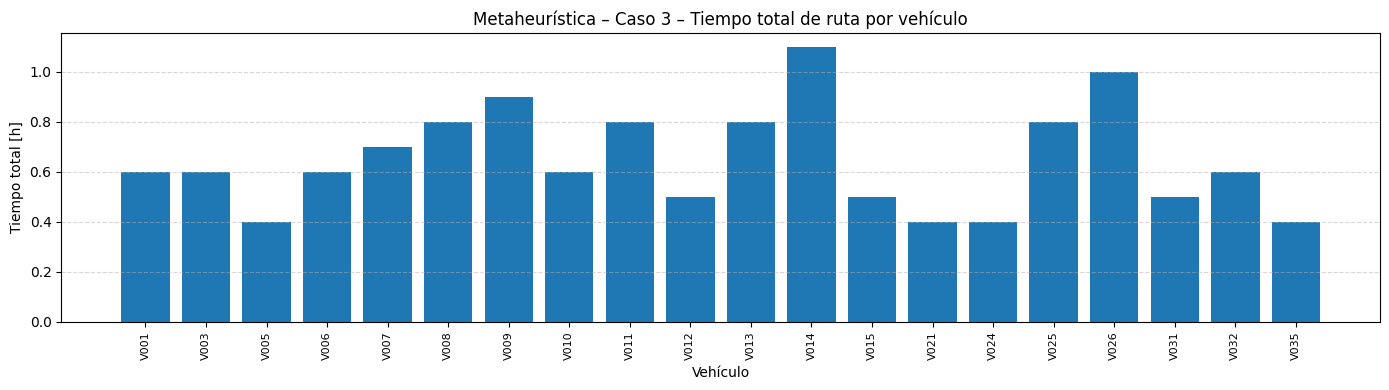

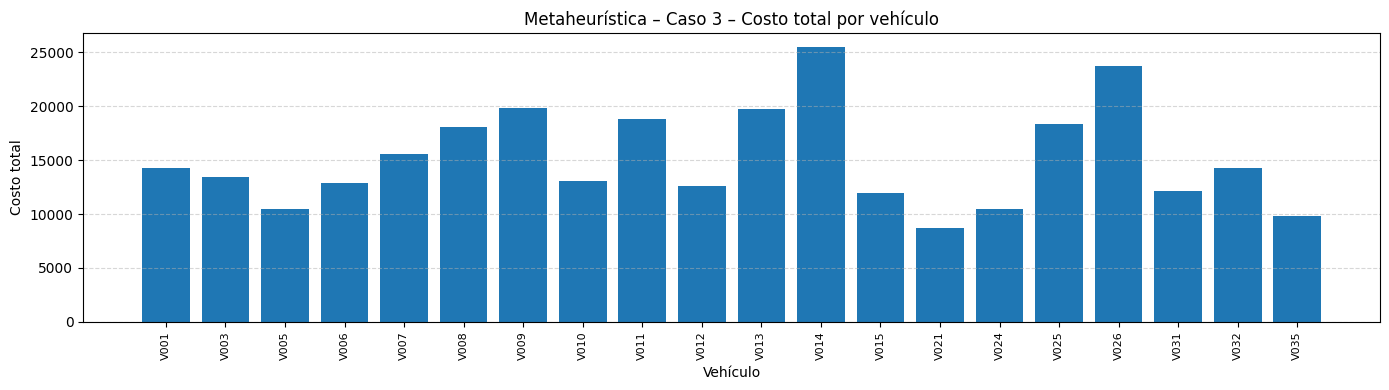

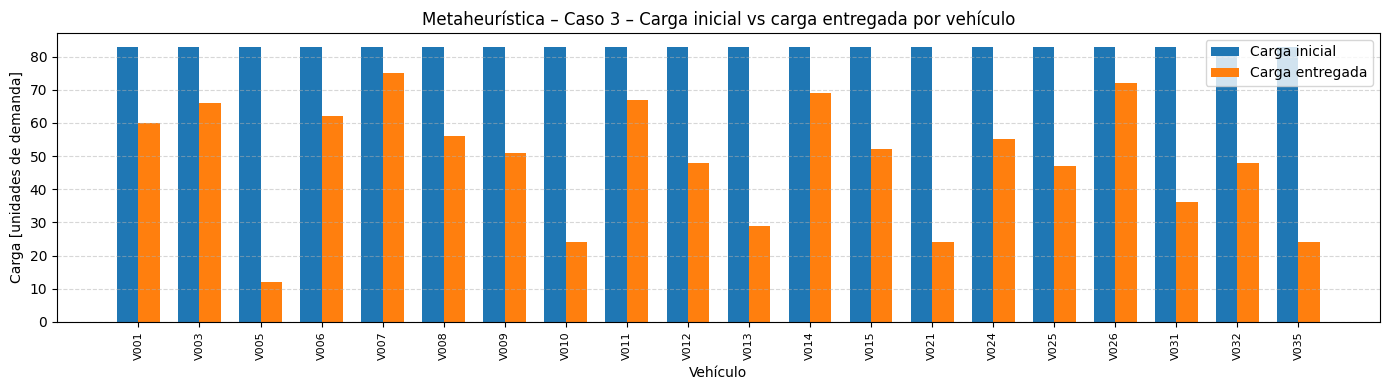

Mapa de rutas guardado en: mapa_rutas_Metaheuristica_caso_3.htm


In [61]:
demands_C3 = dict(zip(clients_C3["LocationID"], clients_C3["Demand"]))

dist_df_C3      = pd.read_csv("Proyecto_A_Caso3/dist_matrix_C3.csv", index_col=0)
dist_matrix_C3  = dist_df_C3.values
num_nodes_C3    = dist_matrix_C3.shape[0]
num_vehicles_C3 = len(vehicles_C3)

depot_id_C3 = depots_CB["StandardizedID"].iloc[0]   
idx_to_label_C3 = build_idx_to_label_map(dist_df_C3)

def build_ga_case3(seed):
    random.seed(seed)
    np.random.seed(seed)
    ga = GeneticAlgorithmCVRP(
        cost_matrix=dist_matrix_C3,
        demands=demands_C3,
        vehicle_capacity=Q_3,
        num_customers=num_nodes_C3,
        num_vehicles=num_vehicles_C3,
        C_fixed=C_fixed_A,
        C_dist=C_dist_A,
        C_time=C_time_A,
        C_fuel_per_km=C_fuel_A,
        depots=[1],
        population_size=200,
        generations=300,
        mutation_rate=0.2,
        crossover_rate=0.8,
        elitism_rate=0.1,
        tournament_size=5,
        avg_speed_kmh=50,
        capacity_penalty=1e4
    )
    return ga

resultados_C3 = run_ga_experiments(
    build_ga_case3,
    n_runs=3,
    base_seed=300,
    verbose=True
)

best_row_C3  = resultados_C3.loc[resultados_C3["best_fitness"].idxmin()]
best_seed_C3 = int(best_row_C3["seed"])

ga_best_C3 = build_ga_case3(best_seed_C3)
t0 = time.time()
ga_best_C3.solve(verbose=False)
cpu_time_best_C3 = time.time() - t0

verif_GA_C3 = build_verification_from_ga(
    ga=ga_best_C3,
    idx_to_label=idx_to_label_C3,
    vehicles_df=vehicles_C3,
    depot_label=depot_id_C3,
    avg_speed_kmh=50.0
)

verif_GA_C3 = verif_GA_C3[verif_GA_C3["ClientsServed"] > 0].reset_index(drop=True)
display(verif_GA_C3)
verif_GA_C3.to_csv("verificacion_metaheuristica_GA_A_caso3.csv", index=False)

plot_verification_report(
    verif_csv="verificacion_metaheuristica_GA_A_caso3.csv",
    case_name="Metaheurística – Caso 3",
    depots_df=depot_C3,     
    clients_df=clients_C3,   
    depot_id=depot_id_CB,     
    map_html="mapa_rutas_Metaheuristica_caso_3.htm"
)


### Analisis de Escalabilidad

In [66]:
def correAgoritmo(clients,vehicles, parameters, dist_df ): 
    t0 = time.time()
    
    C_fixed_A, C_dist_A, C_time_A, C_fuel_A = get_cost_parameters(parameters)
    demands_ = dict(zip(clients["LocationID"], clients["Demand"]))


    dist_matrix = dist_df.values
    num_nodes   = dist_matrix.shape[0]
    num_vehicles = len(vehicles)


    def build_ga_case(seed):
        random.seed(seed)
        np.random.seed(seed)
        ga = GeneticAlgorithmCVRP(
            cost_matrix=dist_matrix,
            demands=demands_,
            vehicle_capacity=Q_2,
            num_customers=num_nodes,
            num_vehicles=num_vehicles,
            C_fixed=C_fixed_A,
            C_dist=C_dist_A,
            C_time=C_time_A,
            C_fuel_per_km=C_fuel_A,
            depots=[1],
            population_size=200,
            generations=300,
            mutation_rate=0.2,
            crossover_rate=0.8,
            elitism_rate=0.1,
            tournament_size=5,
            avg_speed_kmh=50,
            capacity_penalty=1e4
        )
        return ga

    resultados_ = run_ga_experiments(
        build_ga_case,
        n_runs=3,
        base_seed=200,
        verbose=True
    )

    best_row_  = resultados_.loc[resultados_["best_fitness"].idxmin()]
    best_seed_ = int(best_row_["seed"])

    ga_best_ = build_ga_case2(best_seed_)

    ga_best_.solve(verbose=False)
    cpu_time = time.time() - t0



    return (cpu_time)



def cargarClientes (clients, depocitos ):
    
    depot_df = depocitos[["StandardizedID", "Latitude", "Longitude"]].iloc[[0]].copy()

    nodes = pd.concat(
        [
            depot_df,
            clients[["StandardizedID", "Latitude", "Longitude"]]
        ],
        ignore_index=False
    )
    nodes = (
        nodes
        .drop_duplicates(subset="StandardizedID")
        .set_index("StandardizedID")
        .sort_index()   
    )

    std_ids = nodes.index.to_list()
    n = len(std_ids)
    dist_matrix = np.zeros((n, n), dtype=float)
    for i, id_i in enumerate(std_ids):
        lat_i, lon_i = nodes.loc[id_i, ["Latitude", "Longitude"]]
        for j, id_j in enumerate(std_ids):
            lat_j, lon_j = nodes.loc[id_j, ["Latitude", "Longitude"]]
            dist_matrix[i, j] = haversine_km(lat_i, lon_i, lat_j, lon_j)

    dist_df = pd.DataFrame(dist_matrix, index=std_ids, columns=std_ids)
    return dist_df



clientsE = pd.read_csv("Analisis de Escalabilidad Clinetes/clients.csv")
depots  = pd.read_csv("Analisis de Escalabilidad Clinetes/depots.csv")
vehicles = pd.read_csv("Analisis de Escalabilidad Clinetes/vehicles.csv")

caps = vehicles_CB["Capacity"]
Q = int(round(caps_base.mean()))
vehicles["Capacity"] = Q_base
parameters = pd.read_csv("Analisis de Escalabilidad Clinetes/parameters_urban.csv")

TiemposM = []


for prueba in range(100, 1001, 100):
    print("------Escenario con", prueba, "clientes------")

    clients = clientsE[clientsE["Scenario"] == prueba].copy()
    dist_df = cargarClientes(clients, depots )


    
    TiemposM.append( correAgoritmo(clients,vehicles, parameters, dist_df))







------Escenario con 100 clientes------
Gen 0: best=10698773.62, current=10698773.62, time=0.4s
Gen 10: best=10337555.20, current=10337555.20, time=4.5s
Gen 20: best=9898727.92, current=9898727.92, time=8.2s
Gen 30: best=9371900.47, current=9371900.47, time=12.0s
Gen 40: best=9203663.95, current=9203663.95, time=15.7s
Gen 50: best=9064047.71, current=9064047.71, time=19.2s
Gen 60: best=8897213.99, current=8897213.99, time=24.1s
Gen 70: best=8810962.49, current=8810962.49, time=27.6s
Gen 80: best=8591548.67, current=8591548.67, time=31.2s
Gen 90: best=8509562.97, current=8509562.97, time=34.6s
Gen 100: best=8445590.59, current=8445590.59, time=38.0s
Gen 110: best=8424999.52, current=8424999.52, time=41.3s
Gen 120: best=8373823.80, current=8373823.80, time=44.9s
Gen 130: best=8345036.93, current=8345036.93, time=48.6s
Gen 140: best=8226911.82, current=8226911.82, time=52.3s
Gen 150: best=8075625.06, current=8075625.06, time=55.7s
Gen 160: best=8010647.36, current=8010647.36, time=59.0s
St

,run,seed,best_fitness,cpu_time_sec
0,1,200,7.976583e+06,60.266566
1,2,201,8.418829e+06,60.134189
2,3,202,8.050555e+06,60.271145


------Escenario con 200 clientes------
Gen 0: best=15610391.87, current=15610391.87, time=0.6s
Gen 10: best=15457946.00, current=15457946.00, time=7.8s
Gen 20: best=15224483.56, current=15224483.56, time=13.2s
Gen 30: best=15073115.19, current=15073115.19, time=18.5s
Gen 40: best=14971845.44, current=14971845.44, time=24.2s
Gen 50: best=14892965.41, current=14892965.41, time=29.7s
Gen 60: best=14820544.04, current=14820544.04, time=34.9s
Gen 70: best=14714938.32, current=14714938.32, time=40.3s
Gen 80: best=14656369.60, current=14656369.60, time=45.8s
Gen 90: best=14526249.25, current=14526249.25, time=51.1s
Gen 100: best=14395217.76, current=14395217.76, time=56.5s
Stopped by time limit: 60.3s (gen 108)
Terminado. Mejor fitness = 14349372.41
Run 1 | seed=200 | best_fitness=14349372.41 | time=60.72s
Gen 0: best=15556383.89, current=15556383.89, time=0.6s
Gen 10: best=15493486.95, current=15493486.95, time=6.1s
Gen 20: best=15293078.85, current=15293078.85, time=11.6s
Gen 30: best=15101

,run,seed,best_fitness,cpu_time_sec
0,1,200,1.434937e+07,60.722209
1,2,201,1.418225e+07,61.694483
2,3,202,1.446020e+07,60.628660


------Escenario con 300 clientes------
Gen 0: best=20957145.76, current=20957145.76, time=0.9s
Gen 10: best=20207829.28, current=20207829.28, time=8.9s
Gen 20: best=19298629.16, current=19298629.16, time=16.3s
Gen 30: best=18986302.91, current=18986302.91, time=23.7s
Gen 40: best=18608956.62, current=18608956.62, time=31.0s
Gen 50: best=18363769.34, current=18363769.34, time=38.5s
Gen 60: best=18177229.80, current=18177229.80, time=45.8s
Gen 70: best=17910756.51, current=17910756.51, time=53.1s
Stopped by time limit: 60.3s (gen 80)
Terminado. Mejor fitness = 17827608.39
Run 1 | seed=200 | best_fitness=17827608.39 | time=60.94s
Gen 0: best=20714058.29, current=20714058.29, time=0.9s
Gen 10: best=20482770.07, current=20482770.07, time=8.9s
Gen 20: best=20200119.83, current=20200119.83, time=17.9s
Gen 30: best=19721542.09, current=19721542.09, time=25.7s
Gen 40: best=19338878.66, current=19338878.66, time=33.5s
Gen 50: best=19036145.97, current=19036145.97, time=41.7s
Gen 60: best=1868761

,run,seed,best_fitness,cpu_time_sec
0,1,200,1.782761e+07,60.943773
1,2,201,1.847015e+07,123.032181
2,3,202,1.814502e+07,61.548795


------Escenario con 400 clientes------
Gen 0: best=34785256.51, current=34785256.51, time=1.1s
Gen 10: best=34150300.71, current=34150300.71, time=11.6s
Gen 20: best=33168363.00, current=33168363.00, time=21.2s
Gen 30: best=32120664.80, current=32120664.80, time=30.7s
Gen 40: best=31505642.62, current=31505642.62, time=40.2s
Gen 50: best=30791506.59, current=30791506.59, time=49.6s
Gen 60: best=30347016.91, current=30347016.91, time=59.4s
Stopped by time limit: 60.4s (gen 62)
Terminado. Mejor fitness = 30347016.91
Run 1 | seed=200 | best_fitness=30347016.91 | time=61.05s
Gen 0: best=34749369.69, current=34749369.69, time=1.4s
Gen 10: best=34202537.05, current=34202537.05, time=13.8s
Gen 20: best=33140792.10, current=33140792.10, time=24.4s
Gen 30: best=32163349.20, current=32163349.20, time=34.1s
Gen 40: best=31536593.91, current=31536593.91, time=44.7s
Gen 50: best=30803054.69, current=30803054.69, time=54.6s
Stopped by time limit: 60.3s (gen 57)
Terminado. Mejor fitness = 30505509.60

,run,seed,best_fitness,cpu_time_sec
0,1,200,3.034702e+07,61.049439
1,2,201,3.050551e+07,60.984037
2,3,202,2.951056e+07,61.323554


------Escenario con 500 clientes------
Gen 0: best=49145539.11, current=49145539.11, time=1.5s
Gen 10: best=48291879.17, current=48291879.17, time=14.5s
Gen 20: best=46921357.70, current=46921357.70, time=26.6s
Gen 30: best=46151805.88, current=46151805.88, time=38.8s
Gen 40: best=44827162.91, current=44827162.91, time=50.7s
Stopped by time limit: 60.4s (gen 49)
Terminado. Mejor fitness = 43886063.98
Run 1 | seed=200 | best_fitness=43886063.98 | time=61.38s
Gen 0: best=50074905.29, current=50074905.29, time=1.4s
Gen 10: best=49198776.87, current=49198776.87, time=14.6s
Gen 20: best=47847449.67, current=47847449.67, time=26.7s
Gen 30: best=46614481.47, current=46614481.47, time=40.3s
Gen 40: best=45593525.67, current=45593525.67, time=52.6s
Stopped by time limit: 61.1s (gen 48)
Terminado. Mejor fitness = 45042581.11
Run 2 | seed=201 | best_fitness=45042581.11 | time=61.83s
Gen 0: best=49428454.88, current=49428454.88, time=1.4s
Gen 10: best=49094621.91, current=49094621.91, time=15.2s
G

,run,seed,best_fitness,cpu_time_sec
0,1,200,4.388606e+07,61.384810
1,2,201,4.504258e+07,61.834441
2,3,202,4.359107e+07,61.711776


------Escenario con 600 clientes------
Gen 0: best=67782859.50, current=67782859.50, time=1.8s
Gen 10: best=66745111.24, current=66745111.24, time=18.9s
Gen 20: best=64545650.66, current=64545650.66, time=34.3s
Gen 30: best=63239148.28, current=63239148.28, time=49.2s
Stopped by time limit: 61.4s (gen 39)
Terminado. Mejor fitness = 61853594.64
Run 1 | seed=200 | best_fitness=61853594.64 | time=62.21s
Gen 0: best=67298441.55, current=67298441.55, time=1.8s
Gen 10: best=66528994.39, current=66528994.39, time=18.3s
Gen 20: best=64717457.58, current=64717457.58, time=33.6s
Gen 30: best=62616291.38, current=62616291.38, time=49.0s
Stopped by time limit: 61.6s (gen 39)
Terminado. Mejor fitness = 61255358.91
Run 2 | seed=201 | best_fitness=61255358.91 | time=62.37s
Gen 0: best=67084751.98, current=67084751.98, time=1.8s
Gen 10: best=65906194.28, current=65906194.28, time=18.8s
Gen 20: best=63995545.21, current=63995545.21, time=33.4s
Gen 30: best=61881287.25, current=61881287.25, time=49.6s
S

,run,seed,best_fitness,cpu_time_sec
0,1,200,6.185359e+07,62.214504
1,2,201,6.125536e+07,62.366032
2,3,202,6.121638e+07,60.949547


------Escenario con 700 clientes------
Gen 0: best=89046154.26, current=89046154.26, time=2.1s
Gen 10: best=87532901.79, current=87532901.79, time=22.2s
Gen 20: best=84294589.32, current=84294589.32, time=40.8s
Gen 30: best=83330500.81, current=83330500.81, time=58.7s
Stopped by time limit: 60.6s (gen 32)
Terminado. Mejor fitness = 83033107.71
Run 1 | seed=200 | best_fitness=83033107.71 | time=61.45s
Gen 0: best=89109940.48, current=89109940.48, time=2.2s
Gen 10: best=88163742.35, current=88163742.35, time=21.6s
Gen 20: best=86169141.41, current=86169141.41, time=39.8s
Gen 30: best=84065829.86, current=84065829.86, time=58.5s
Stopped by time limit: 60.2s (gen 32)
Terminado. Mejor fitness = 83807822.12
Run 2 | seed=201 | best_fitness=83807822.12 | time=61.19s
Gen 0: best=90528332.39, current=90528332.39, time=2.1s
Gen 10: best=87739899.98, current=87739899.98, time=22.2s
Gen 20: best=86189485.23, current=86189485.23, time=40.6s
Gen 30: best=83984390.17, current=83984390.17, time=58.5s
S

,run,seed,best_fitness,cpu_time_sec
0,1,200,8.303311e+07,61.454637
1,2,201,8.380782e+07,61.191584
2,3,202,8.398439e+07,61.340363


------Escenario con 800 clientes------
Gen 0: best=115287025.22, current=115287025.22, time=2.4s
Gen 10: best=112703374.37, current=112703374.37, time=25.9s
Gen 20: best=110100188.46, current=110100188.46, time=49.5s
Stopped by time limit: 60.4s (gen 26)
Terminado. Mejor fitness = 108709182.34
Run 1 | seed=200 | best_fitness=108709182.34 | time=61.39s
Gen 0: best=116009551.89, current=116009551.89, time=2.5s
Gen 10: best=112308406.10, current=112308406.10, time=26.1s
Gen 20: best=109312415.33, current=109312415.33, time=47.8s
Stopped by time limit: 60.7s (gen 27)
Terminado. Mejor fitness = 107219224.33
Run 2 | seed=201 | best_fitness=107219224.33 | time=61.72s
Gen 0: best=115770740.40, current=115770740.40, time=2.5s
Gen 10: best=113203680.91, current=113203680.91, time=27.0s
Gen 20: best=110588168.80, current=110588168.80, time=49.9s
Stopped by time limit: 61.0s (gen 26)
Terminado. Mejor fitness = 109618748.02
Run 3 | seed=202 | best_fitness=109618748.02 | time=62.02s

Resumen estadís

,run,seed,best_fitness,cpu_time_sec
0,1,200,1.087092e+08,61.391874
1,2,201,1.072192e+08,61.716433
2,3,202,1.096187e+08,62.017322


------Escenario con 900 clientes------


KeyboardInterrupt: 

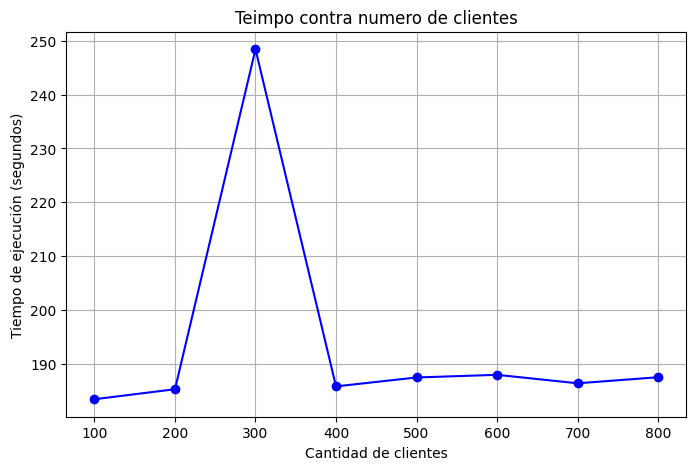

In [68]:
plt.figure(figsize=(8,5))
plt.plot(range(100, 900, 100), TiemposM, marker="o", linestyle="-", color="b")
plt.title("Teimpo contra numero de clientes")
plt.xlabel("Cantidad de clientes")
plt.ylabel("Tiempo de ejecución (segundos)")
plt.grid(True)
plt.show()

Como nos podemos dar cuenta los limites que pusimos fue un maximo de 800  por temas practicos no concideramos que indispensable usar mas clientes estamos multiplicando por 10 la cantidad de clientes que se usa en los casos base. Como nos podemos dar cuanta el tiempo que toma el algritmo en resolver un caso no es dependiente de la cantidad de clientes es más dependiente del caso como tal esto puede suceder porque dependiendo del caso la solcuion es más facil o dificl de encontrar. Si queremos que se demore menos teimpo se podri intentar usar otro metodo de seleccion que tengo una velocidad de convergencia mayor, como por ejmplo ruleta el probelma de esto es que puede que se quede estancado en un minimo local no encontrando el optimo, pero es mejor dar una solucion aunque no sea la obtima. 

## Discusión

La implementación pyomo garantiza (o se aproxima fuertemente) a soluciones óptimas, lo que da una referencia clara para evaluar la calidad de cualquier metaheurística. Además, el modelo exacto produce rutas más compactas y un uso eficiente de la flota en el caso base, concentrando los clientes en menos vehículos con distancias totales más bajas que las del GA. Sin embargo, el costo de esta calidad es elevado en tiempo de cómputo, el caso base requiere un MIP grande con miles de variables binarias y una corrida de varios minutos, lo que hace poco viable este enfoque para instancias urbanas más grandes como el caso 3. Por otro lado, el algoritmo genético encuentra soluciones factibles de buena calidad en tiempos significativamente menores y con una estructura de implementación flexible que facilita ajustar operadores, penalizaciones y parámetros. En el caso base el GA genera rutas con distancias algo mayores y más vehículos utilizados frente al modelo exacto, reflejando una ligera diferencia en costo y en eficiencia de la flota. Sin embargo, en el caso 3 el GA logra atender a todos los clientes distribuyendo la carga en múltiples vehículos, manteniendo distancias por vehículo razonables y costos totales manejables, donde un enfoque exacto sería muy difícil de resolver en tiempos académicamente aceptables.

Para instancias de tamaño pequeño o moderado, se recomienda usar la implementación pyomo para obtener una solución de referencia y entender la estructura óptima de las rutas y el uso de la flota. Esta solución base permite ayudar a calibrar el Algoritmo Genético, estimar el gap típico y justificar que la metaheurística está ofreciendo soluciones suficientemente cercanas al óptimo en términos de costo, distancia y número de vehículos. En escenarios grandes, dinámicos o cuando se requieren muchas ejecuciones, se recomienda priorizar el Algoritmo Genético como herramienta principal de decisión. El GA demostró capacidad para construir rutas factibles en el caso 3, repartiendo los clientes en más de veinte vehículos, con distancias por ruta y costos de combustible que se mantienen en rangos operativamente realistas, lo que lo hace adecuado para planificación táctica en contextos urbanos complejos. Una estrategia razonable es usar el modelo exacto solo en instancias representativas pequeñas para recalibrar periódicamente el GA y validar el desempeño.

En cuanto a desafíos presentados, la implementación pyomo presentó tiempos de resolución crecientes y dificultades para escalar, lo que obliga a fijar límites de tiempo y aceptar soluciones con gap no nulo en instancias de mayor tamaño. El Algoritmo Genético, a pesar de su escalabilidad requiere un proceso iterativo de ajuste de parámetros (tamaño de población, número de generaciones, probabilidad de mutación, selección de semillas) para estabilizar los resultados y reducir la variabilidad entre corridas, así como posibles extensiones con búsqueda local para mejorar la calidad final de las rutas.


## Concluciónes

Para cocncluir podemos desir que la compracion entre Pyomo y el Algoritmo Genético muestra un claro intercambio entre calidad y viabilidad, mientras Pyomo garantiza soluciones óptimas o ofreciendo rutas compactas y un uso eficiente de la flota, su costo computacional lo hace poco escalable en instancias grandes haceindo que se demore mucho teimpo en dar la solucion optima. Por otro lado, el Algoritmo Genético entrega soluciones factibles, pero no necesariamente la obtima de buena calidad en tiempos mucho menores, con flexibilidad para ajustar operadores y parámetros, lo que lo convierte en una herramienta práctica para escenarios urbanos complejos. Así, Pyomo resulta ideal como referencia en instancias pequeñas o moderadas para calibrar y validar el desempeño del GA, mientras que este último se posiciona como la opción preferente en casos grandes o dinámicos, donde la rapidez y adaptabilidad son más valiosas que la exactitud absoluta. Para siguentes pasos se podria anlaizar como se comprta el algoritmo genetico con diefrentes formas de seleccionamiento para darle más rapidez usando metodos que converjan más rapido o exactitud usando metodos que explorando un conjunto más grande del espacio de soluciones. De la mismaa forma se podria implementar otro método como pro ejemplo Búsqueda Tabú o Recocido Simulado para compararlo con el Algoritmo Genético y poder definir cual de estos da una solucion más obtima y en un menor tiempo. 